# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [2]:
import pandas as pd
import sklearn 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/orange_small_churn_data.txt')
label = pd.read_csv('data/orange_small_churn_labels.txt', header=None, names=['label'])

df = pd.merge(data, label, left_index=True, right_index=True)


2\. Рассчитайте доли классов `отток` и `не отток`.

In [4]:
print(label.value_counts())

label
-1       37024
 1        2976
dtype: int64


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [5]:
numeric_features = data.columns[:190]
cat_features = data.columns[191:]

corr_numeric = df.loc[df['label'] == 1, numeric_features].mean(axis='index') - df.loc[df['label'] == -1, numeric_features].mean(axis='index')
corr_numeric.sort_values(key= lambda x: abs(x), ascending=False, inplace=True)
top_20_cor_feature = list(corr_numeric.head(20).index)

In [6]:
top_20_cor_feature

['Var131',
 'Var69',
 'Var53',
 'Var177',
 'Var180',
 'Var114',
 'Var111',
 'Var113',
 'Var153',
 'Var154',
 'Var59',
 'Var124',
 'Var10',
 'Var33',
 'Var139',
 'Var38',
 'Var5',
 'Var182',
 'Var36',
 'Var92']

In [20]:
corr_numeric.dropna(inplace=True)
corr_numeric

Var131    1.034608e+07
Var69     4.808584e+05
Var53     4.389077e+05
Var177    4.017487e+05
Var180    3.201630e+05
              ...     
Var2     -5.181347e-03
Var173    5.087142e-03
Var44    -3.251363e-03
Var138   -1.639344e-03
Var118    0.000000e+00
Length: 174, dtype: float64

In [5]:
top_20_cor_feature.append('label')

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

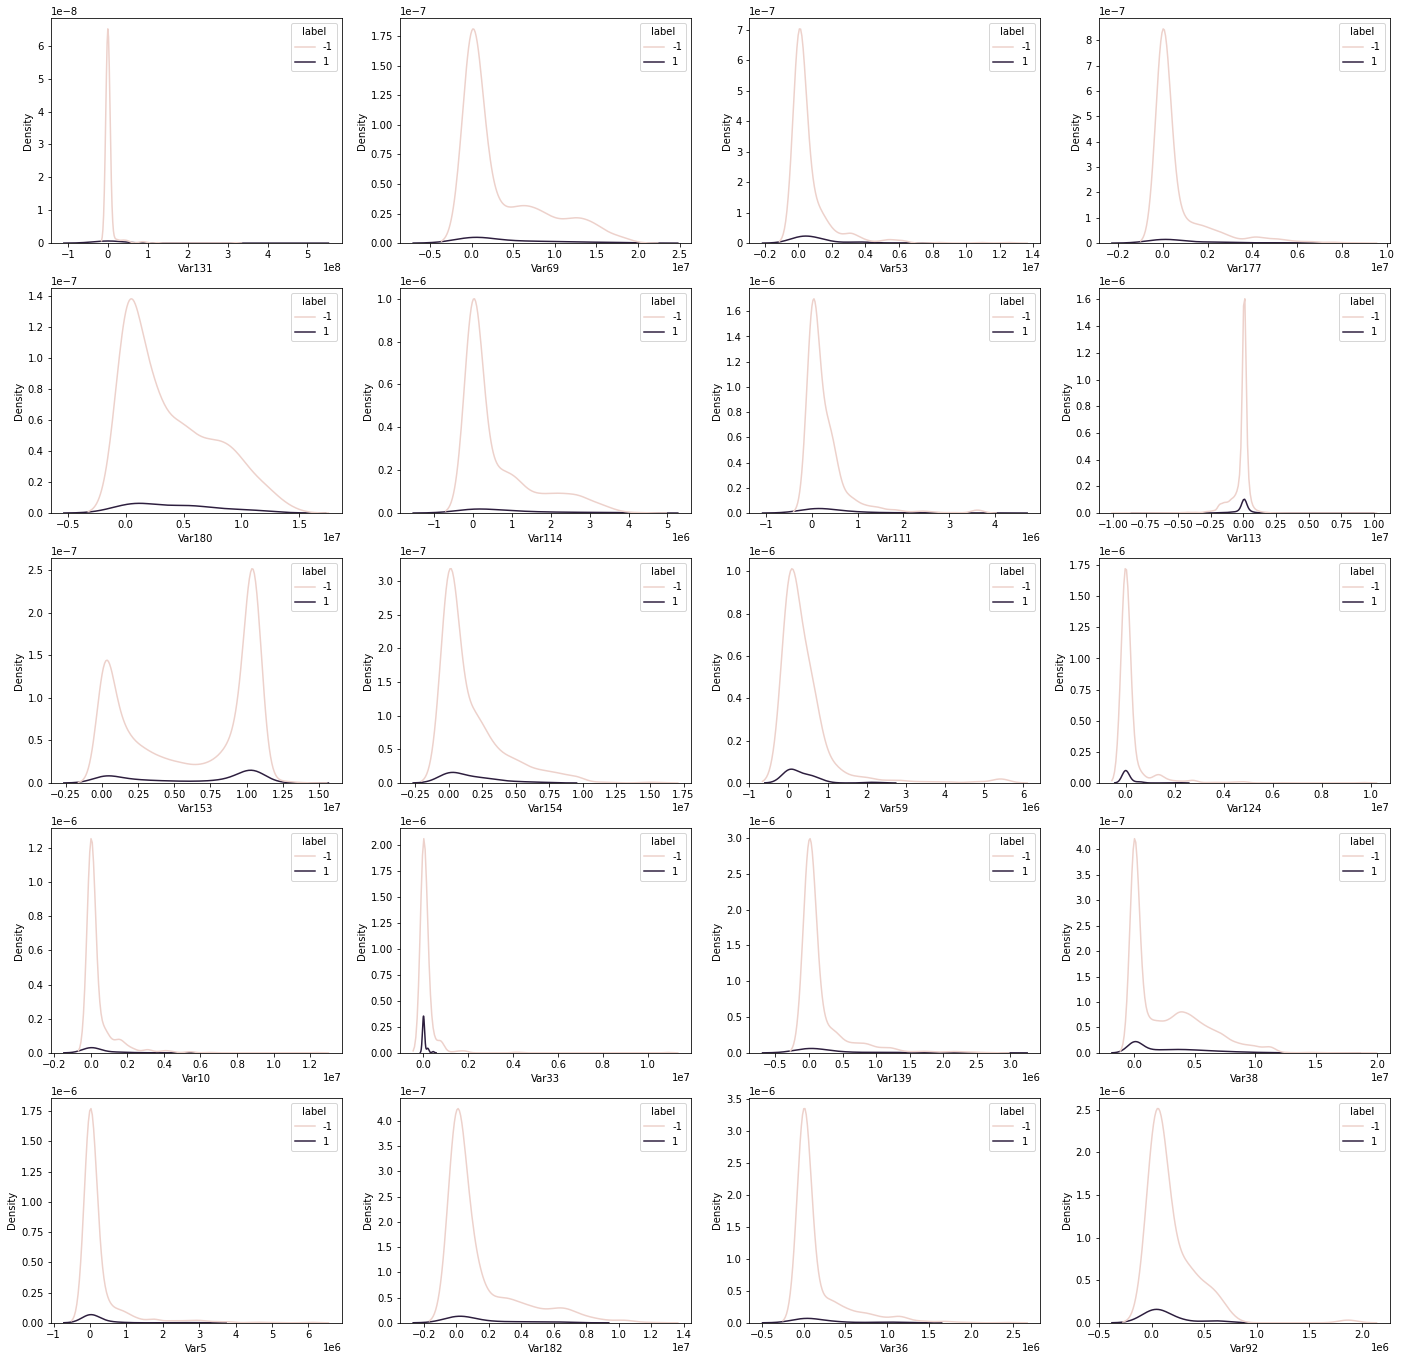

In [112]:
fig, axes = plt.subplots(5,4, figsize=(24,24))
for i in np.arange(20):
    sns.kdeplot(data = df, x=top_20_cor_feature[i], hue='label', ax=axes[i//4, i%4])
#     axes[i//4, i%4].set_title(top_20_cor_feature[i])

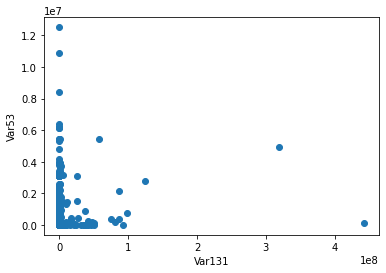

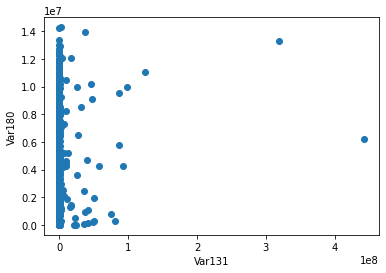

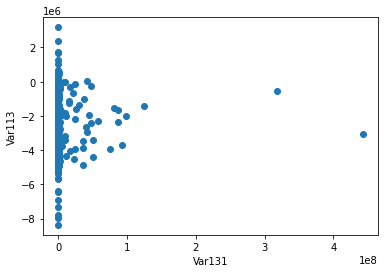

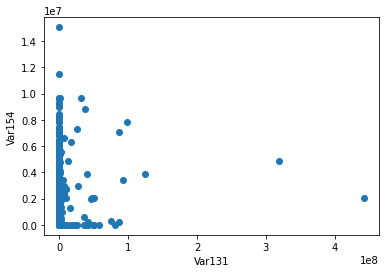

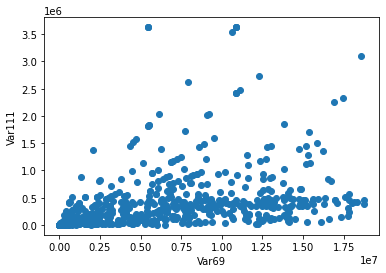

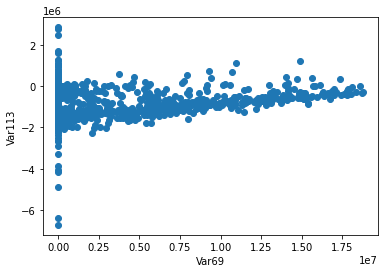

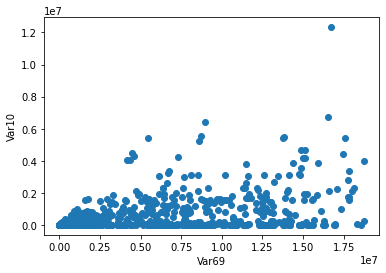

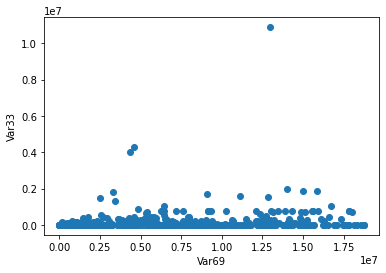

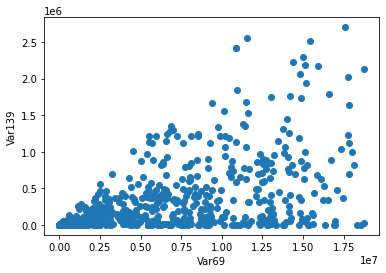

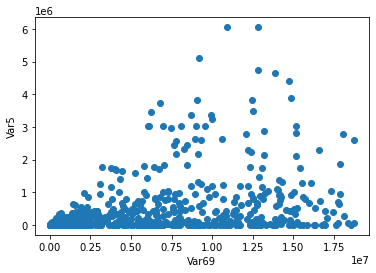

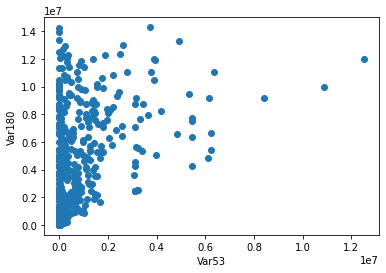

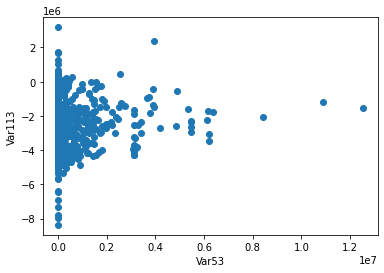

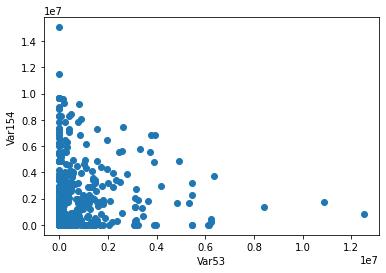

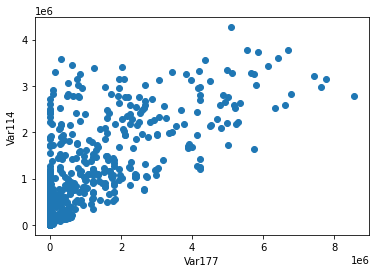

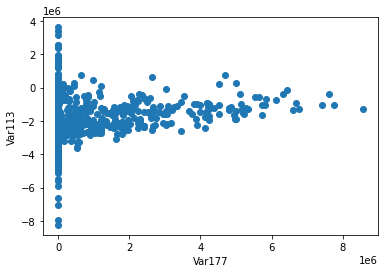

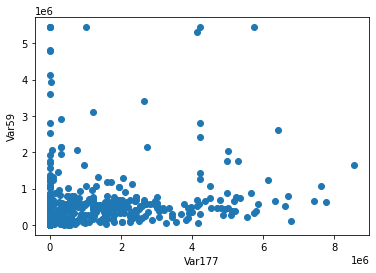

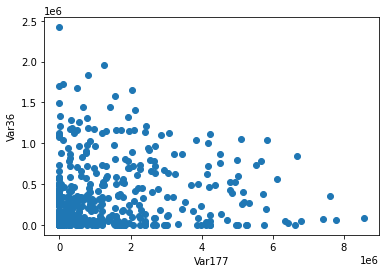

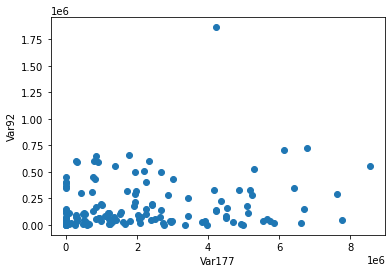

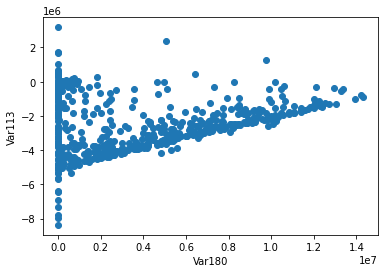

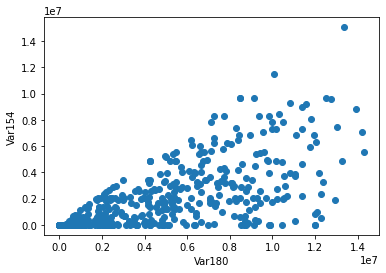

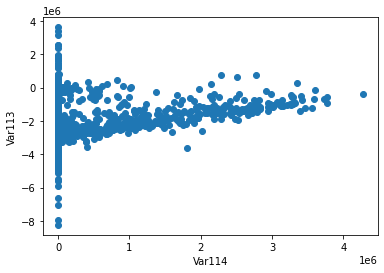

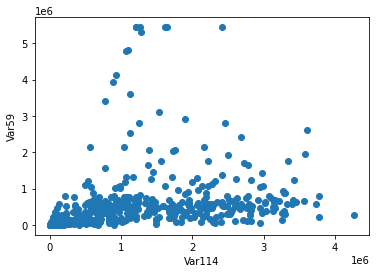

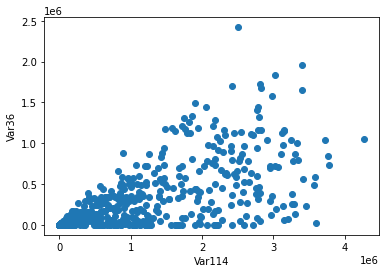

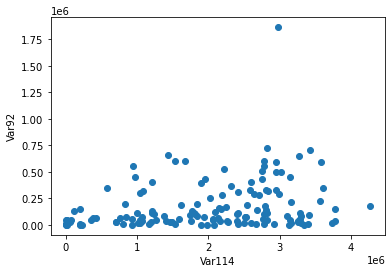

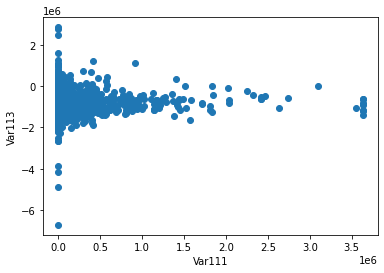

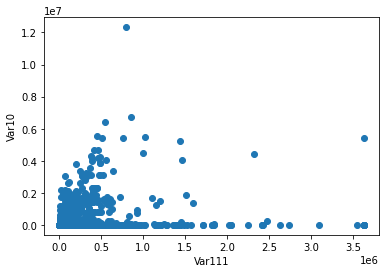

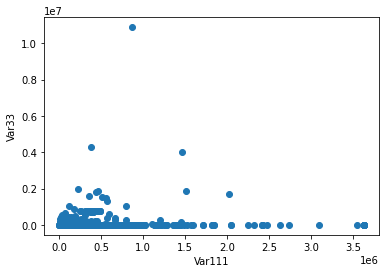

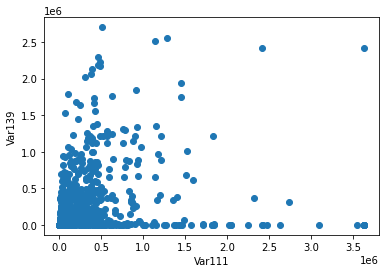

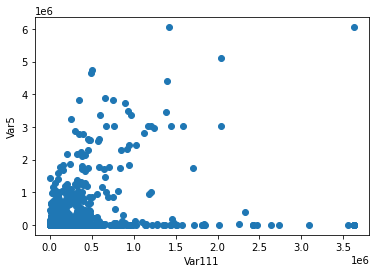

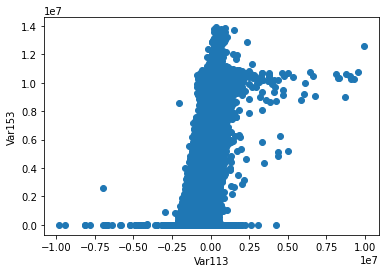

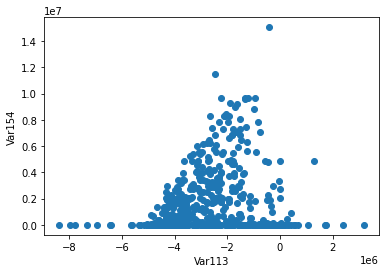

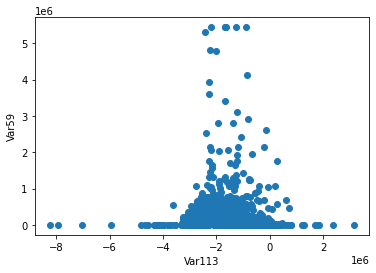

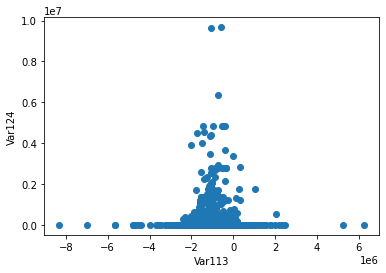

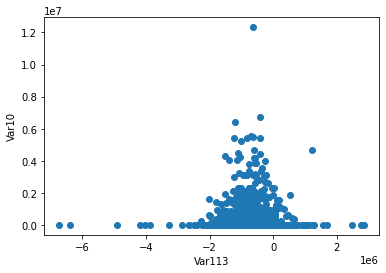

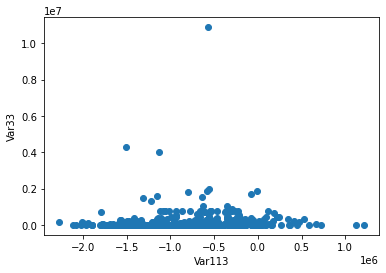

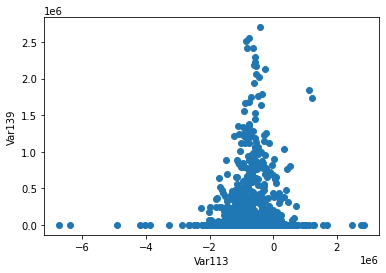

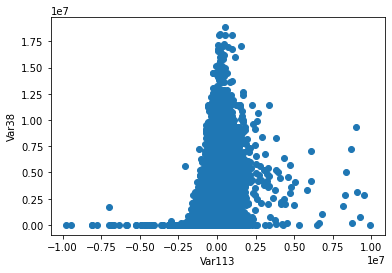

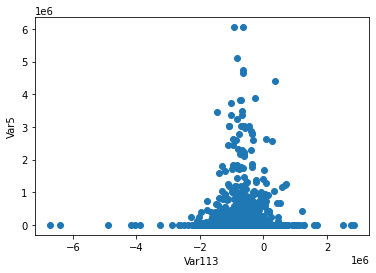

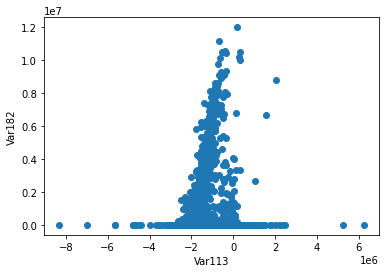

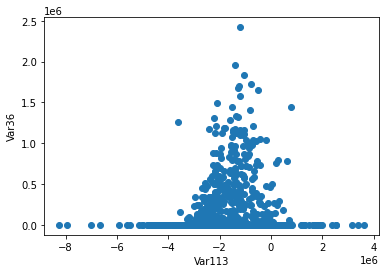

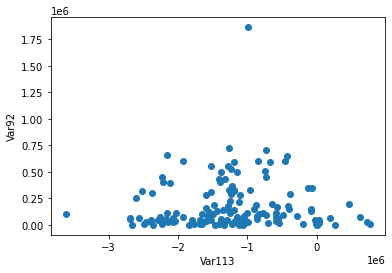

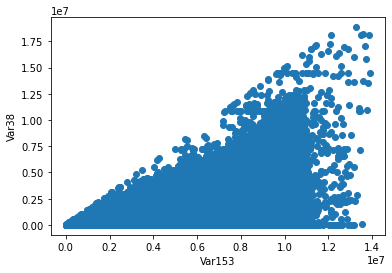

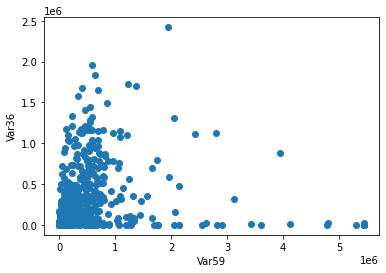

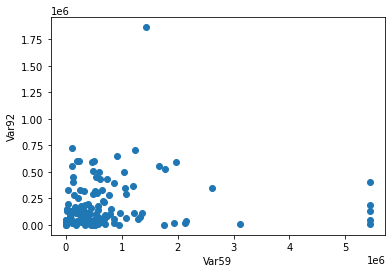

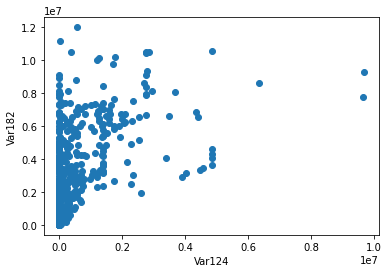

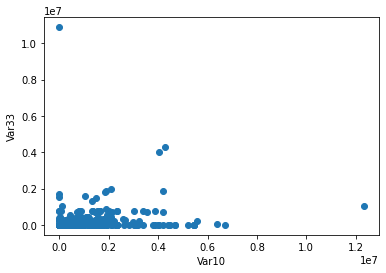

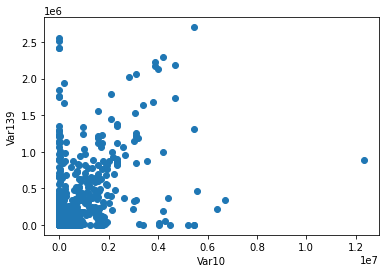

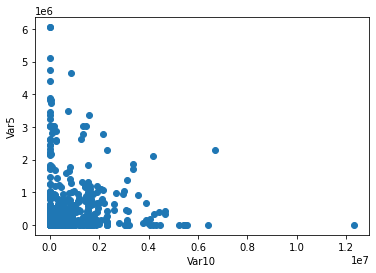

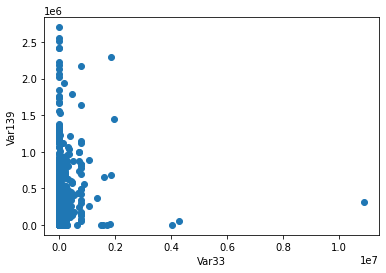

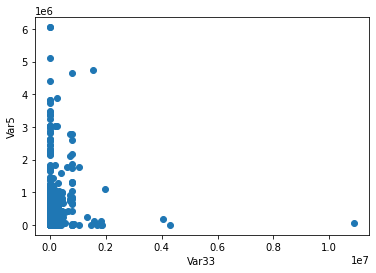

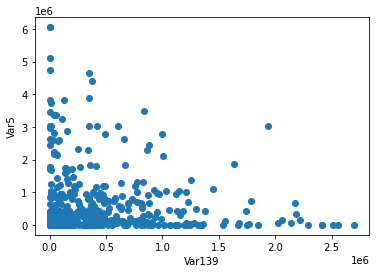

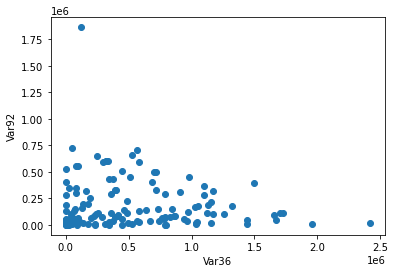

In [17]:
for i in range(19):
    column = top_20_cor_feature[i]
    for i in np.arange(i+1, 20):
        column_1 = top_20_cor_feature[i]
        df_plot = df[(df[column].isnull() == False)&(df[column_1].isnull() == False)][[column, column_1]]
        if not df_plot.empty:
            plt.figure()
            plt.scatter(df_plot[column], df_plot[column_1])
            plt.xlabel(column)
            plt.ylabel(column_1)
            plt.show()

5. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [23]:
random_features = np.random.choice(corr_numeric.index, 10)
random_features 

array(['Var40', 'Var85', 'Var133', 'Var126', 'Var190', 'Var64', 'Var123',
       'Var184', 'Var24', 'Var19'], dtype=object)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

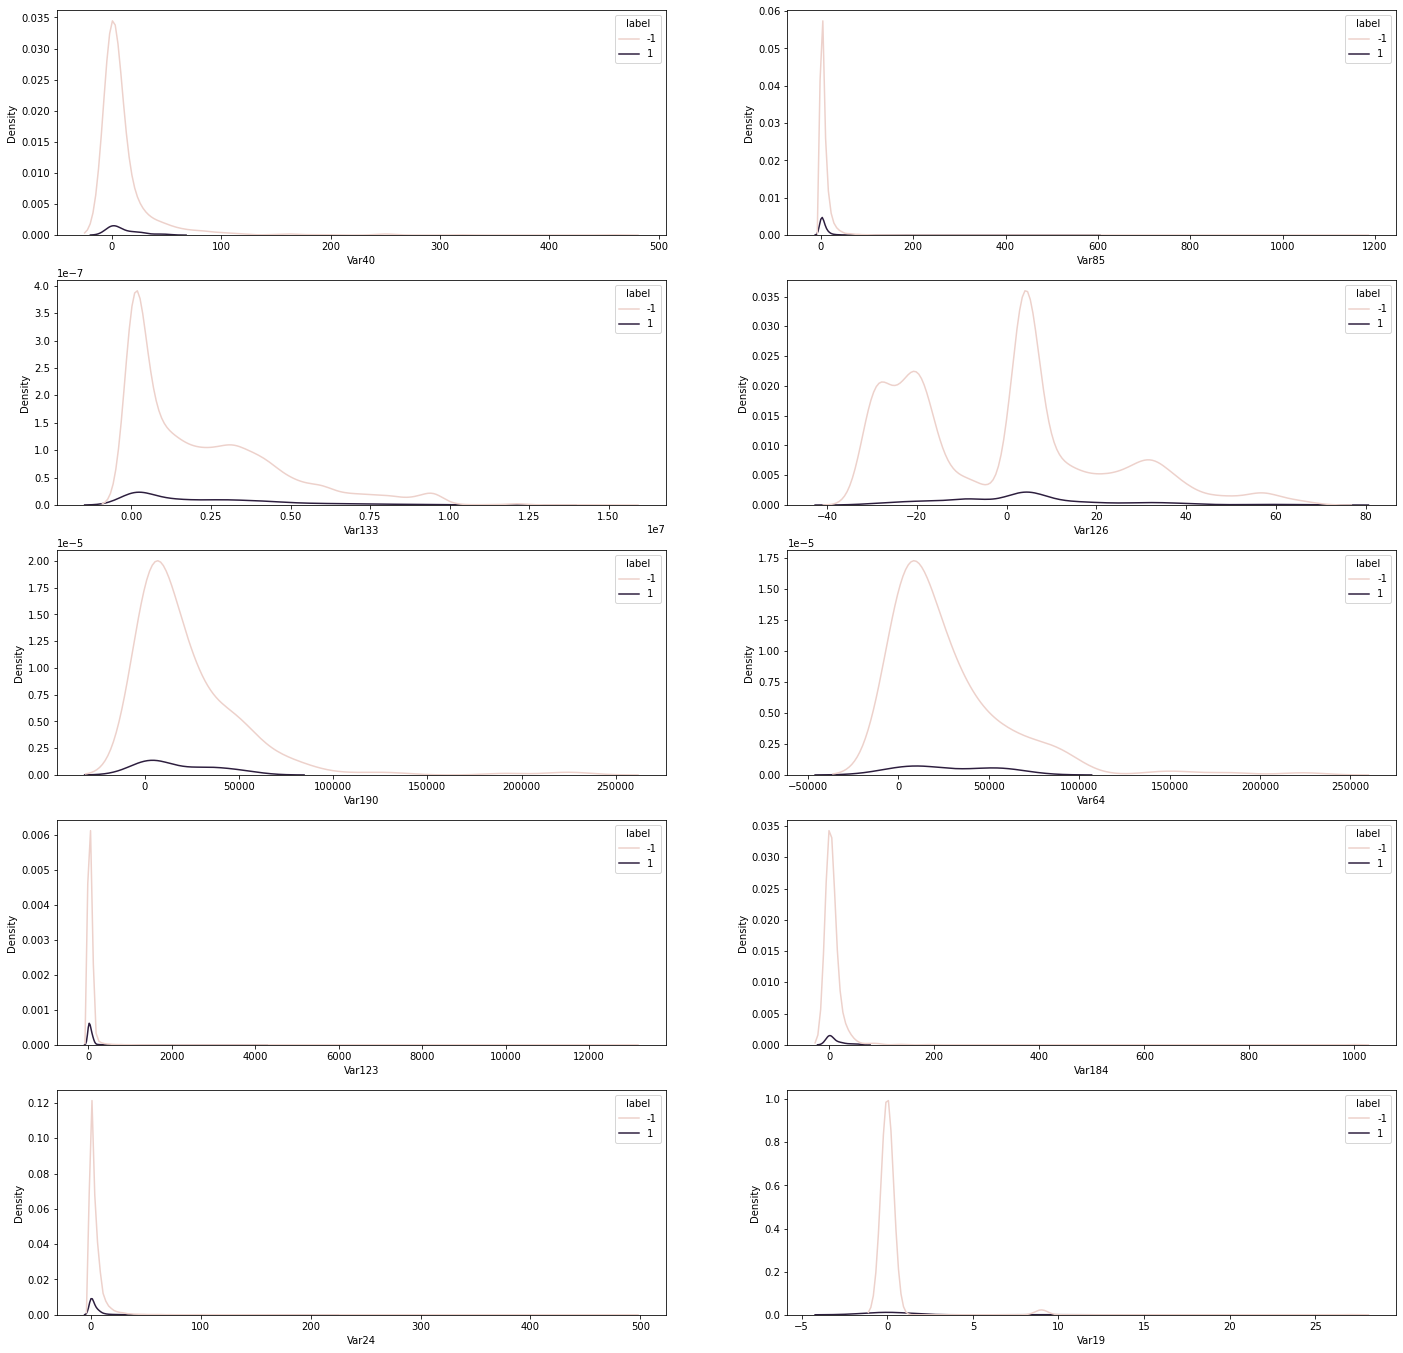

In [28]:
fig, axes = plt.subplots(5,2, figsize=(24,24))
for i in np.arange(10):
    sns.kdeplot(data = df, x=random_features[i], hue='label', ax=axes[i//2, i%2])

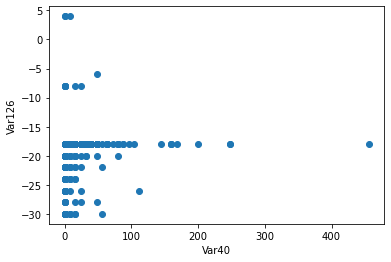

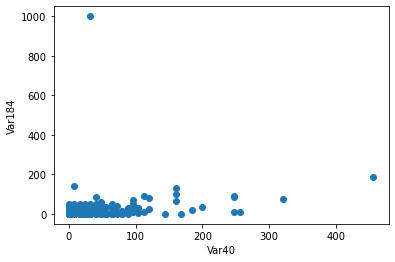

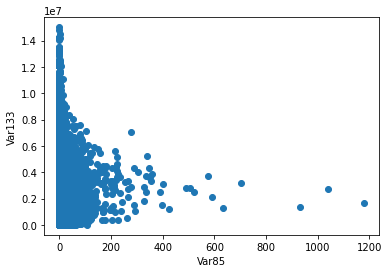

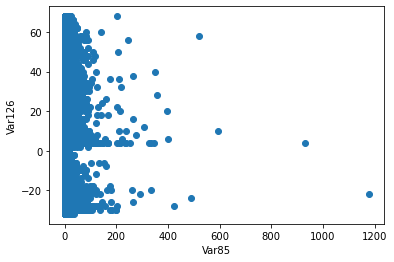

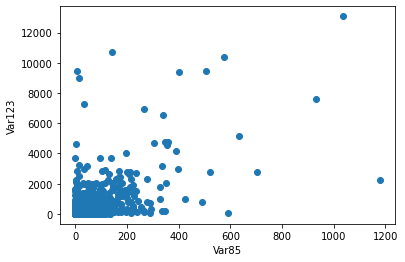

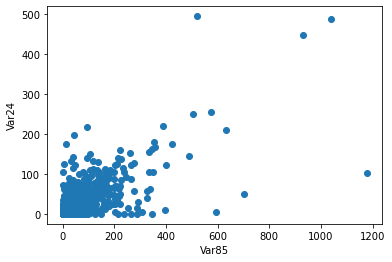

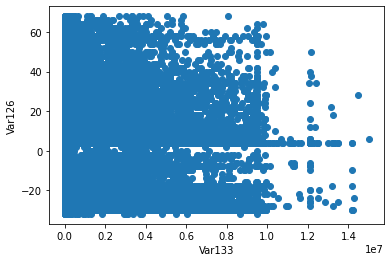

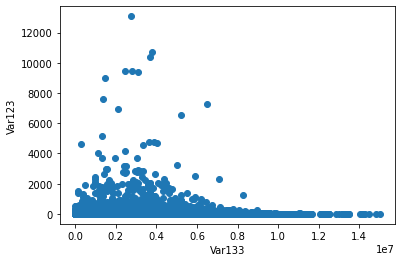

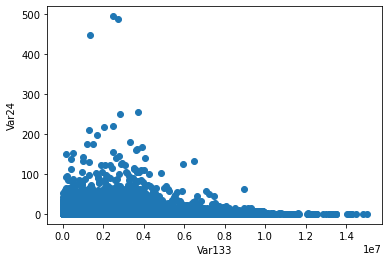

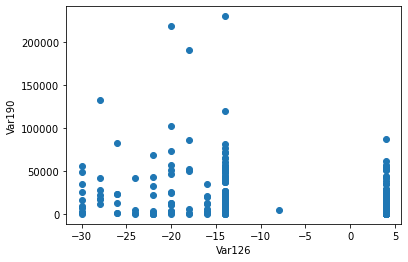

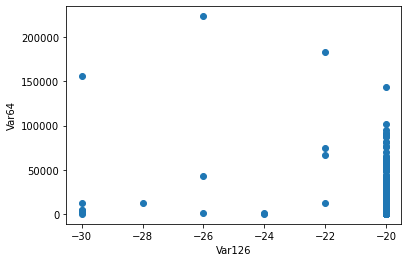

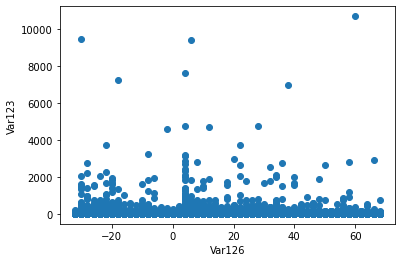

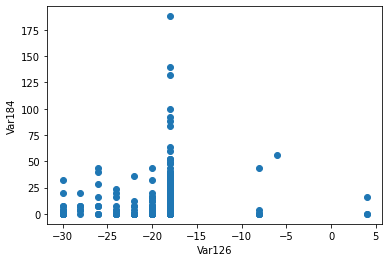

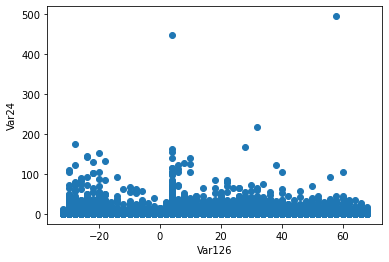

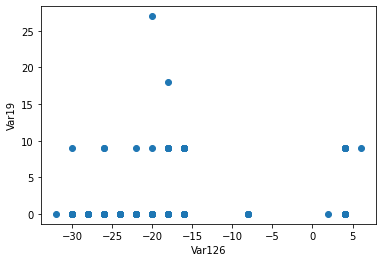

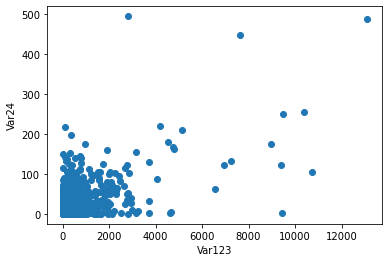

In [30]:
for i in range(9):
    column = random_features[i]
    for i in np.arange(i+1, 10):
        column_1 = random_features[i]
        df_plot = df[(df[column].isnull() == False)&(df[column_1].isnull() == False)][[column, column_1]]
        if not df_plot.empty:
            plt.figure()
            plt.scatter(df_plot[column], df_plot[column_1])
            plt.xlabel(column)
            plt.ylabel(column_1)
            plt.show()

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

<ipython-input-50-86c2663217ce>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18,10))


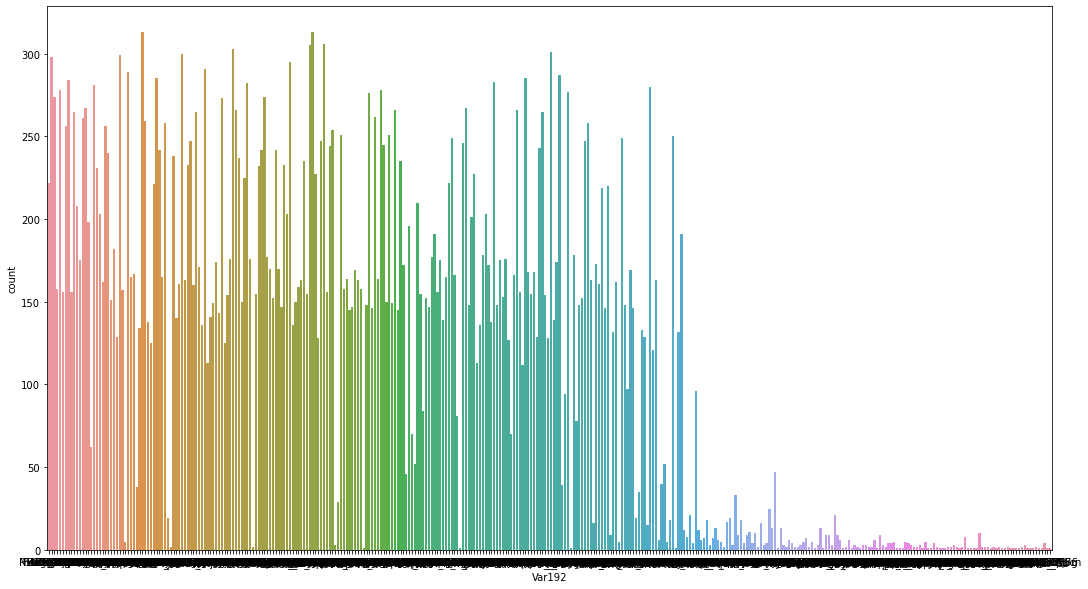

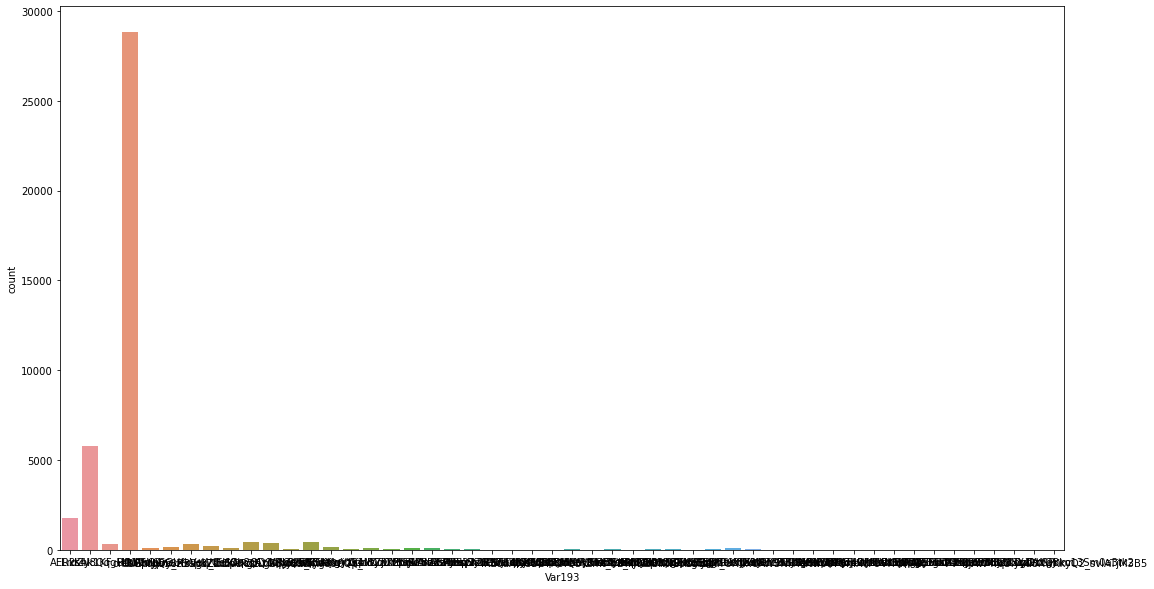

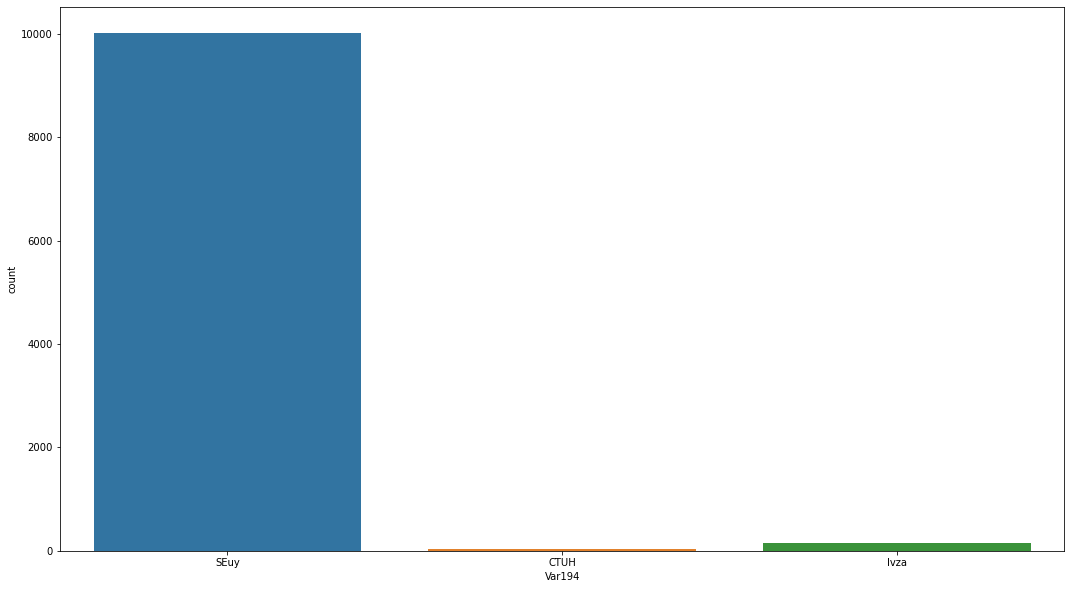

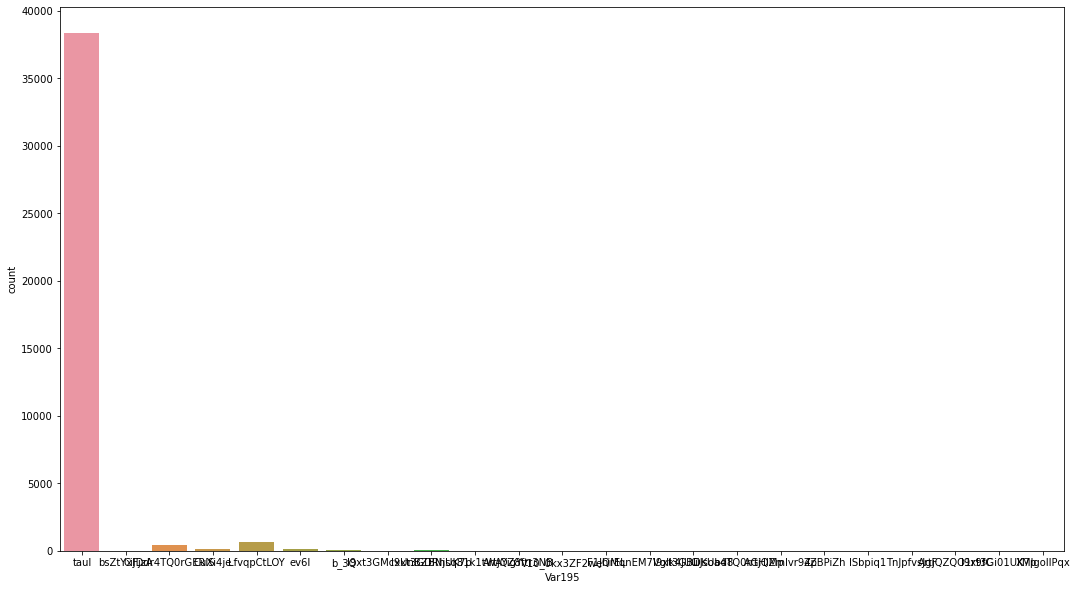

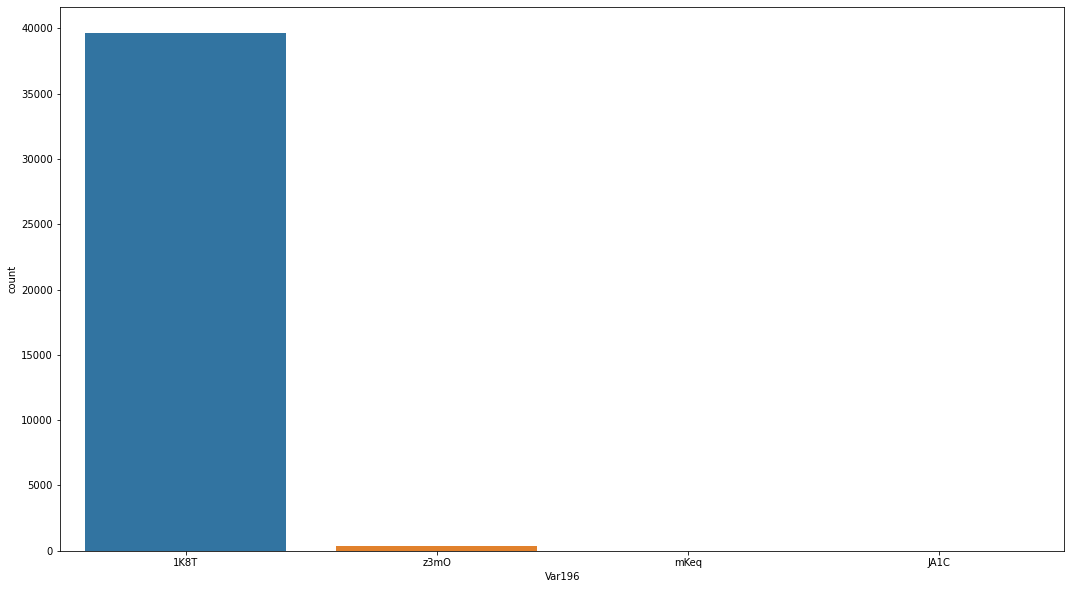

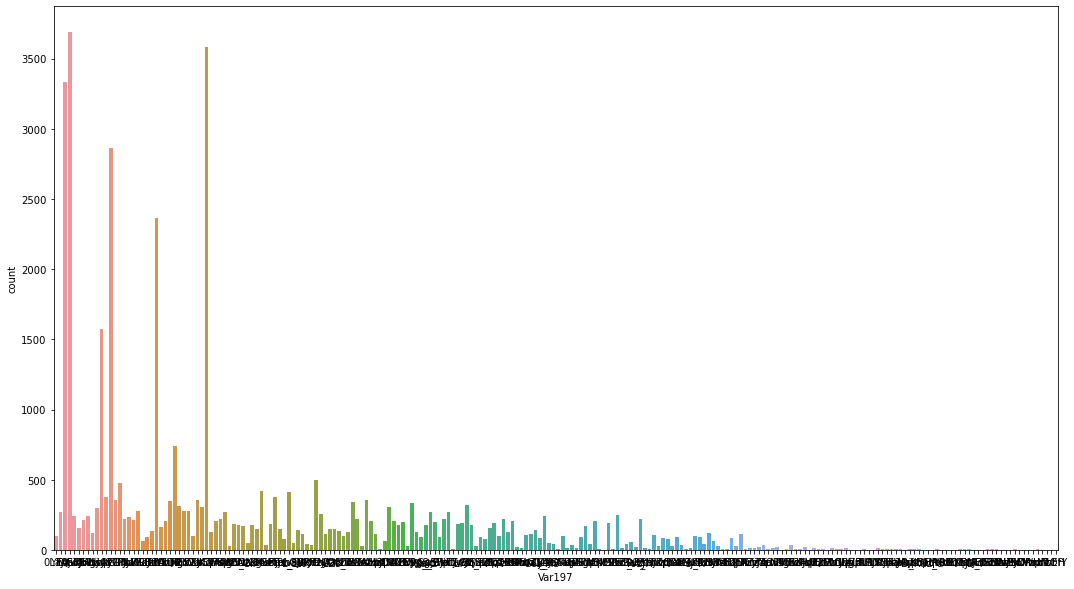

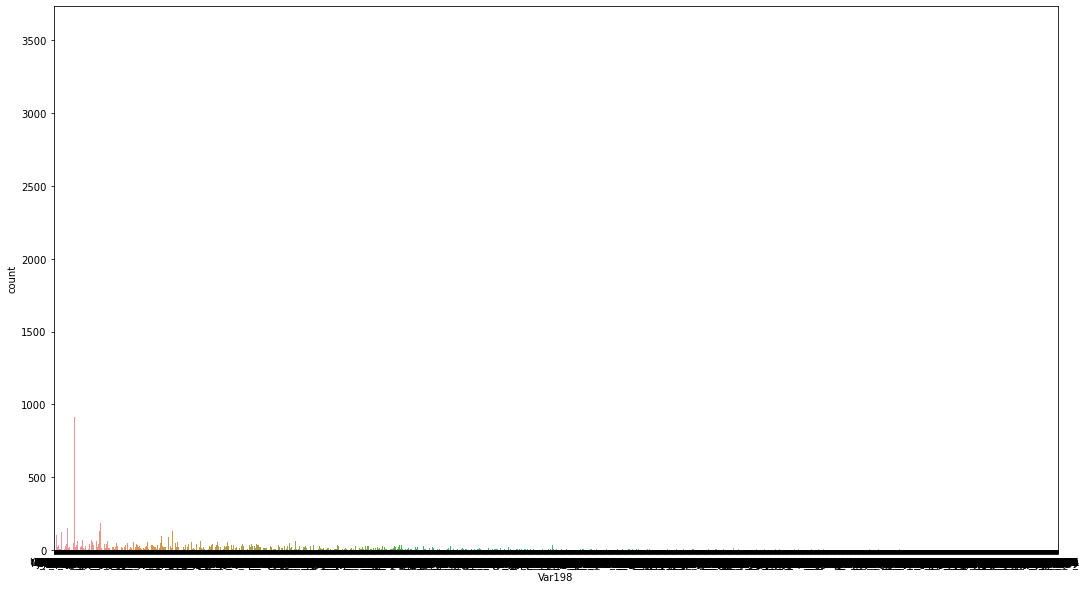

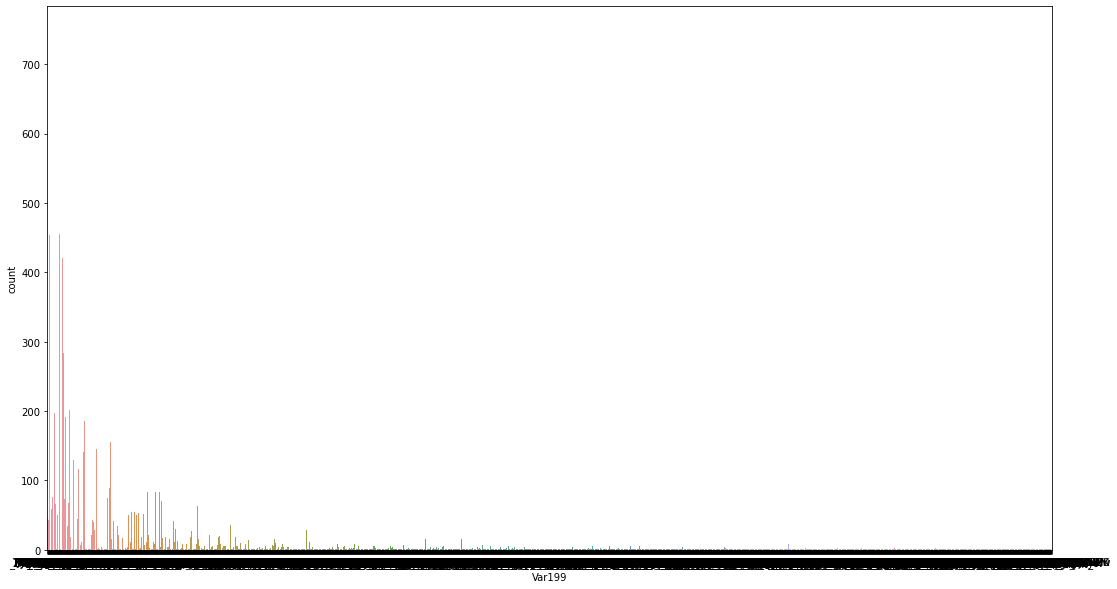

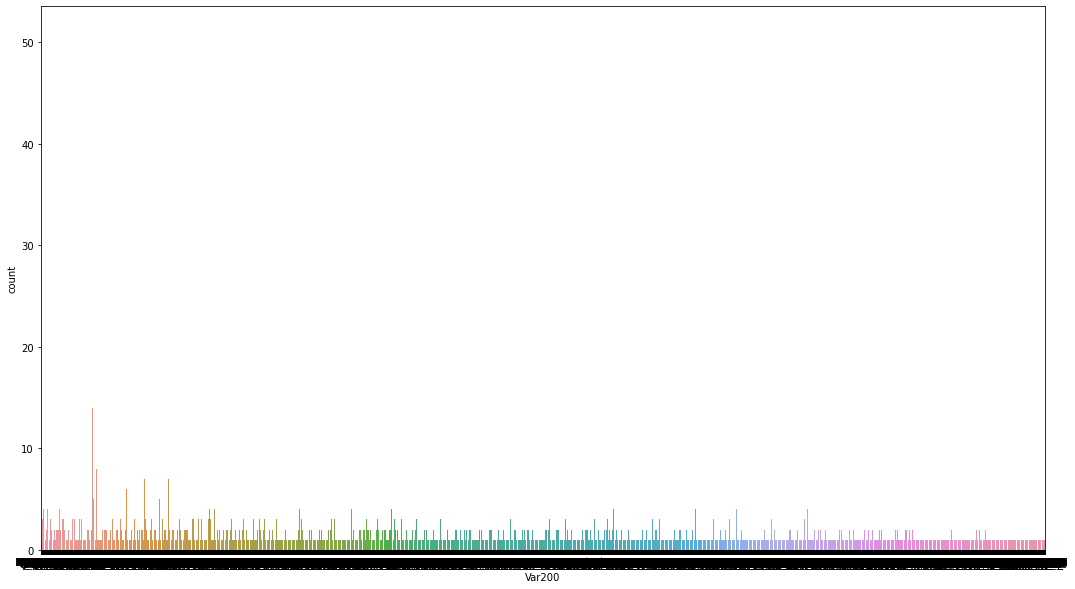

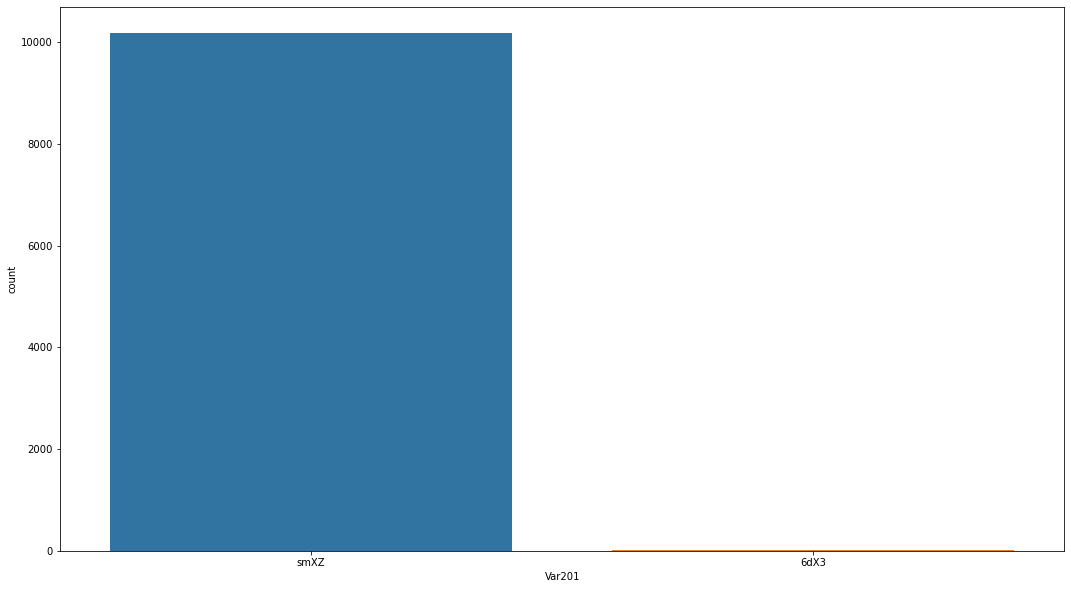

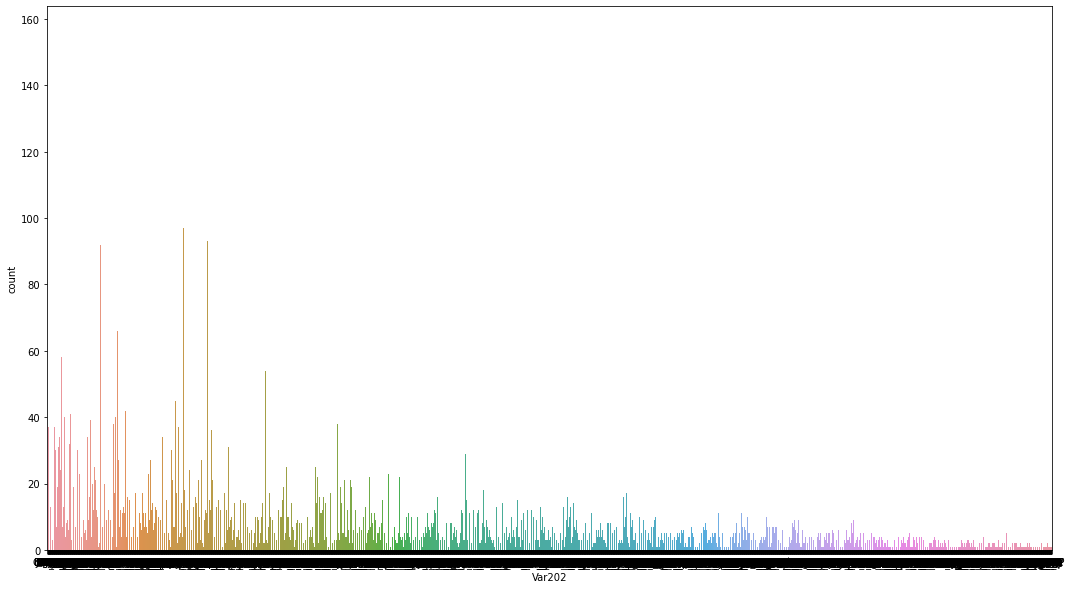

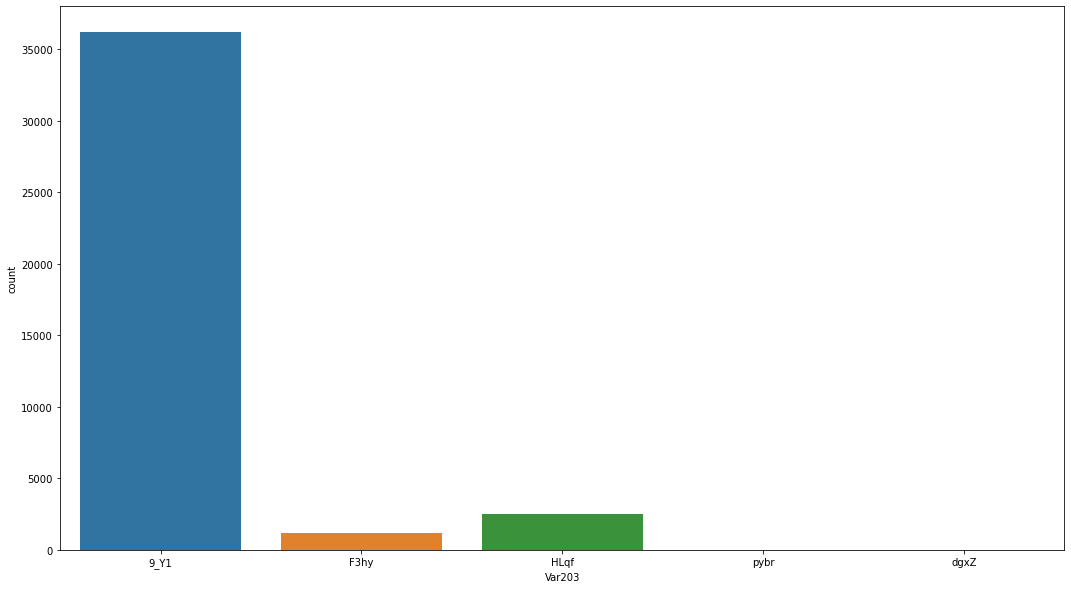

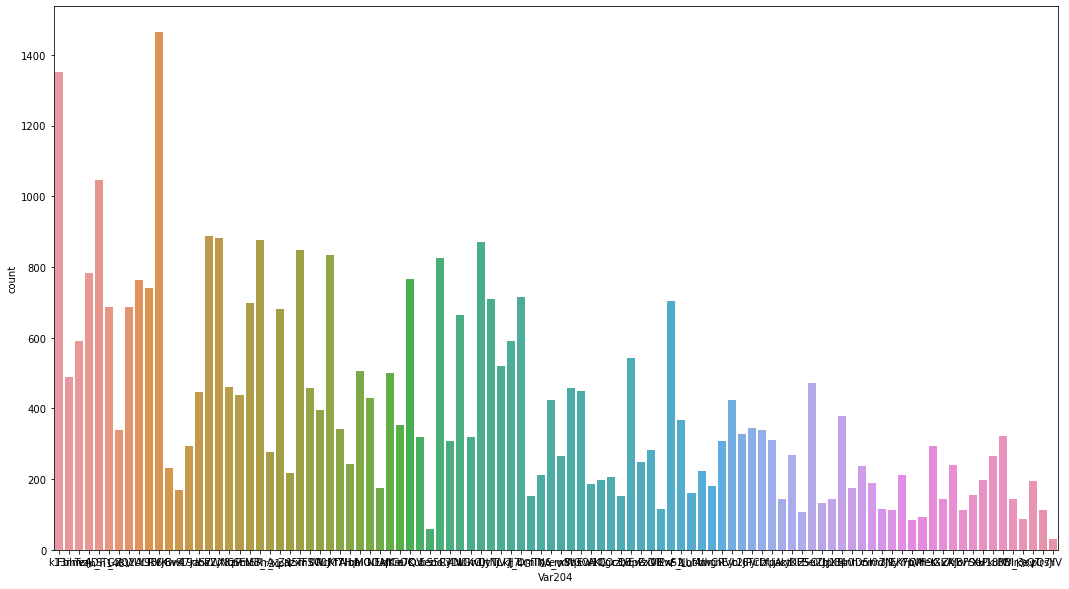

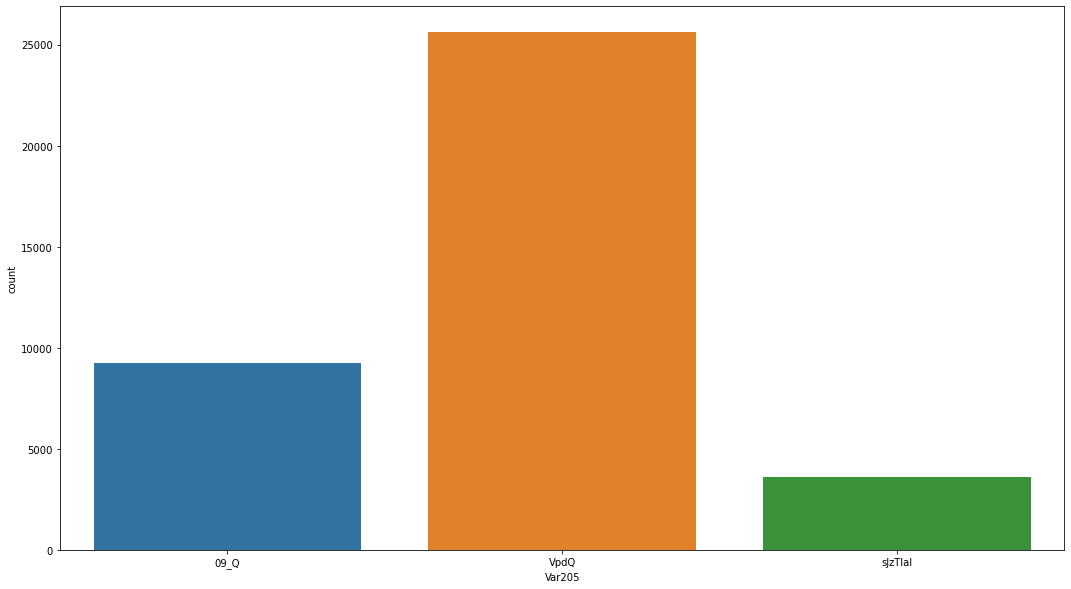

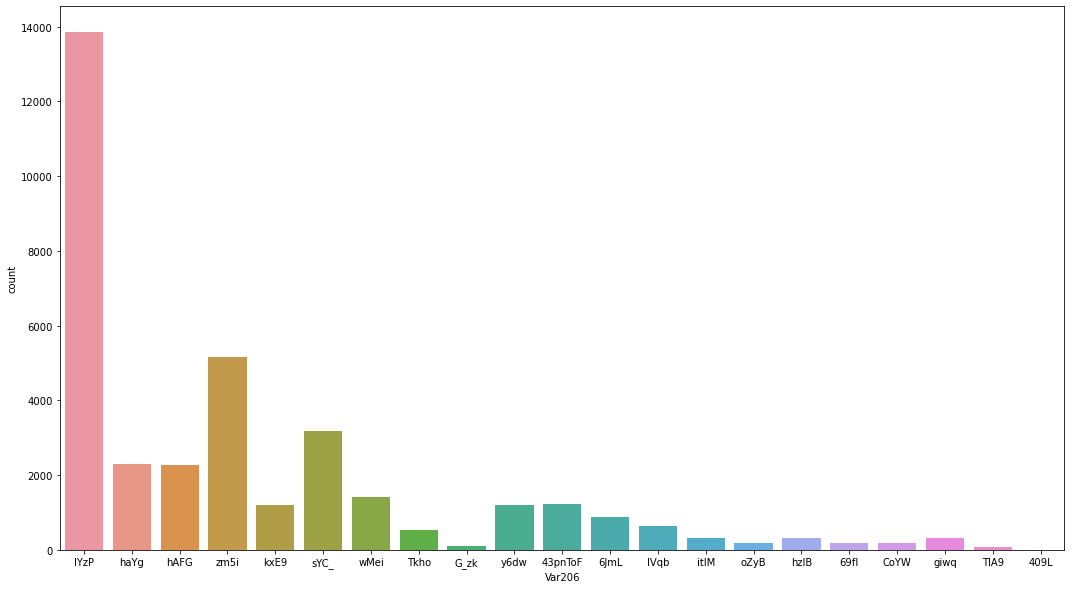

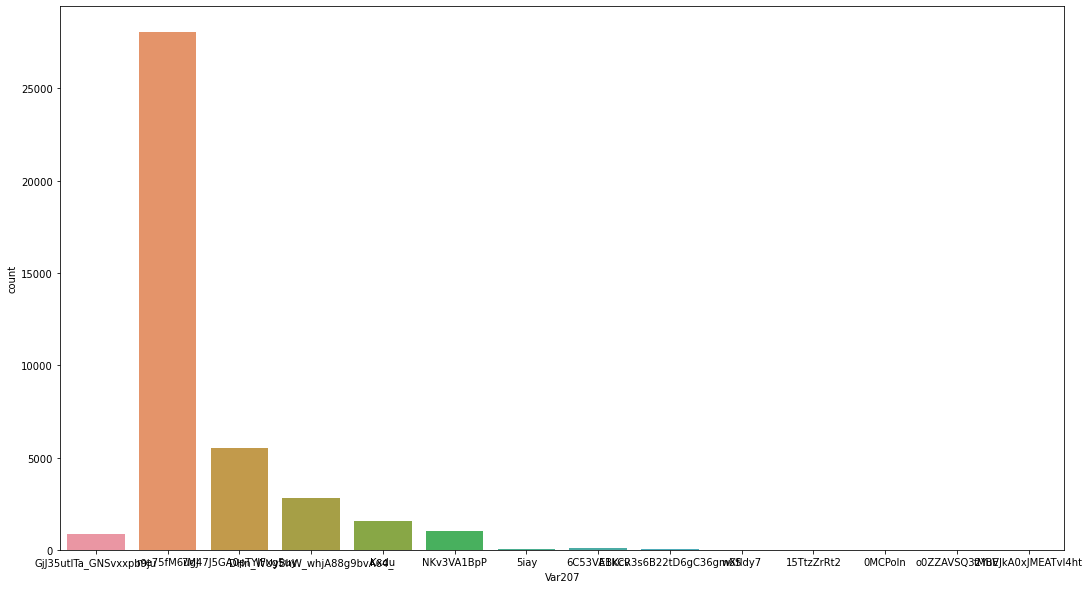

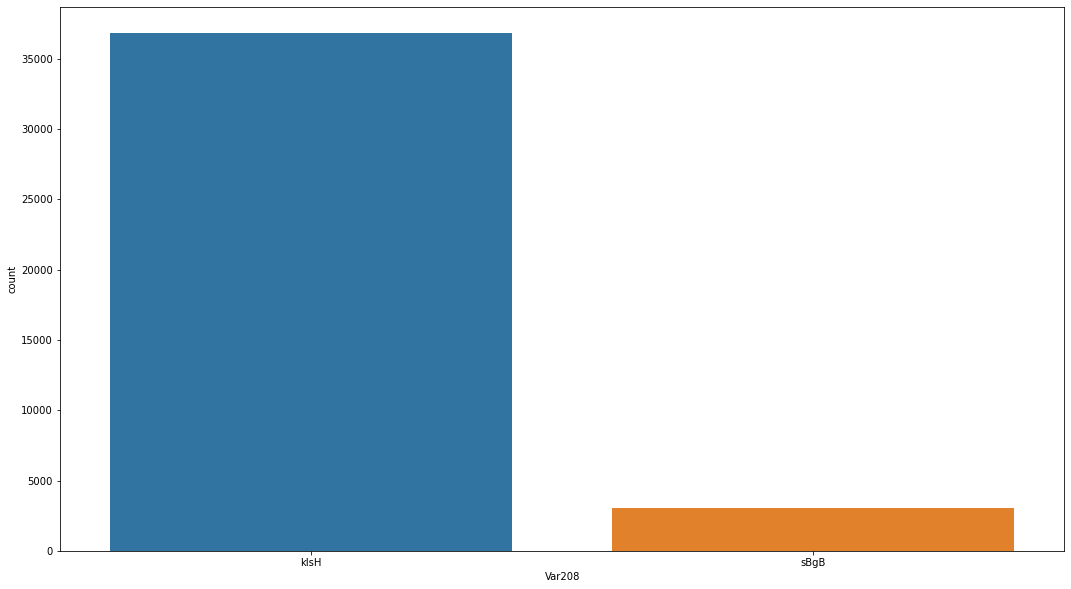

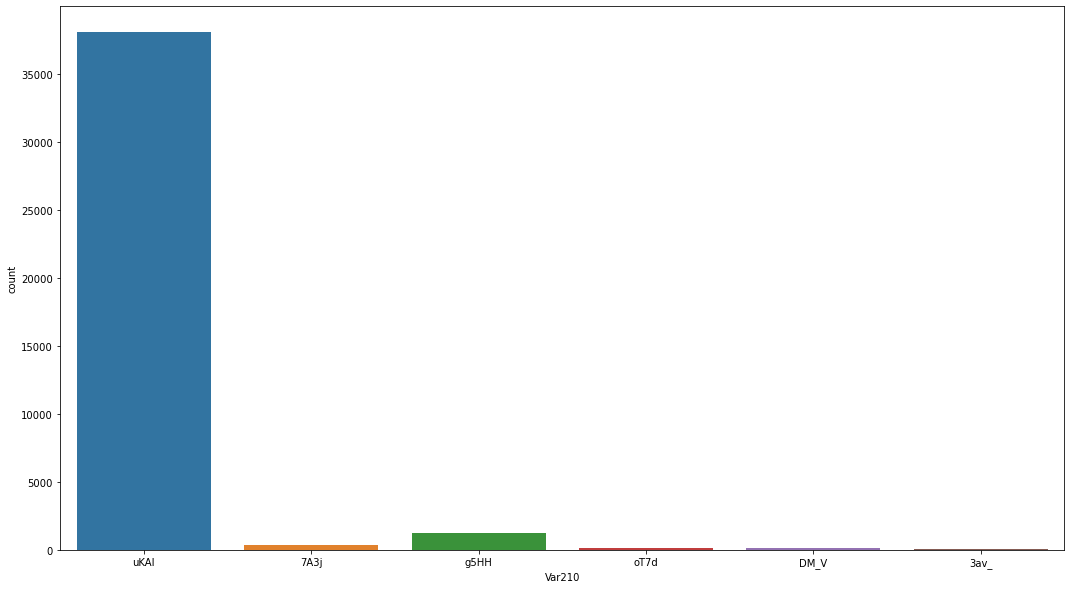

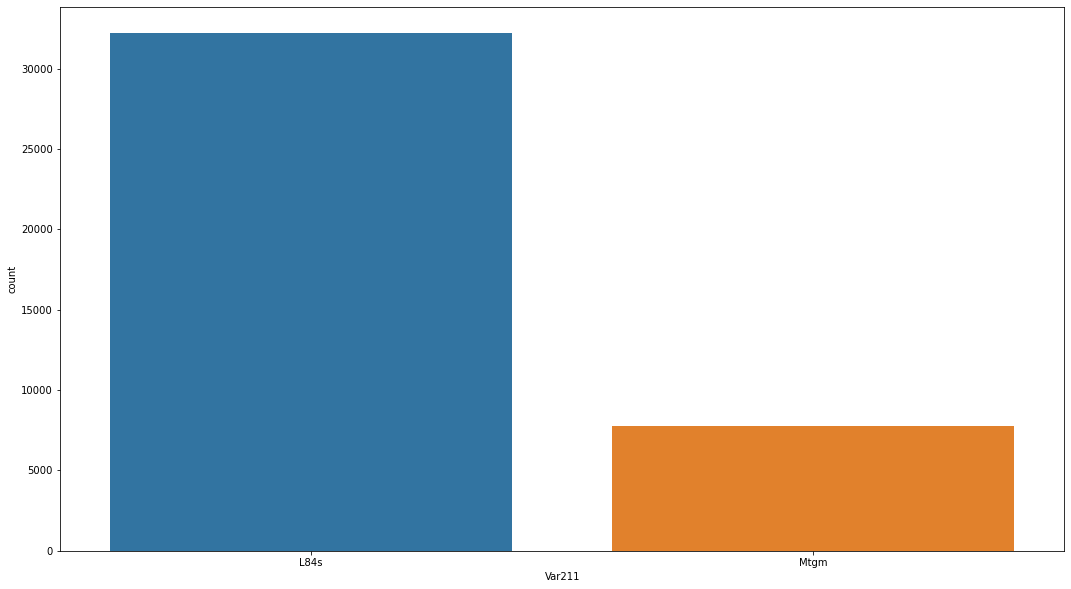

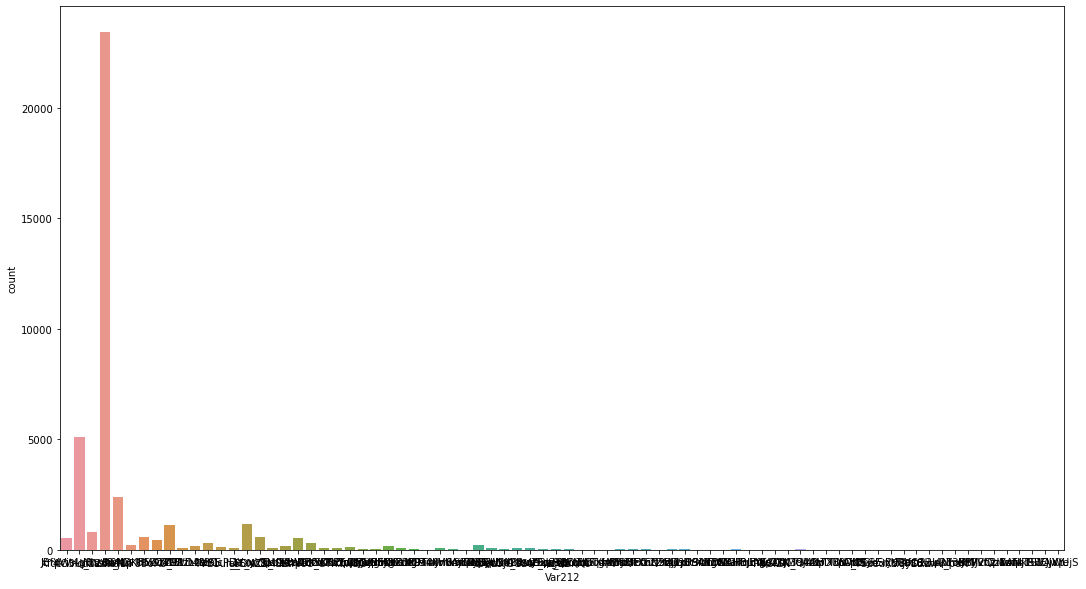

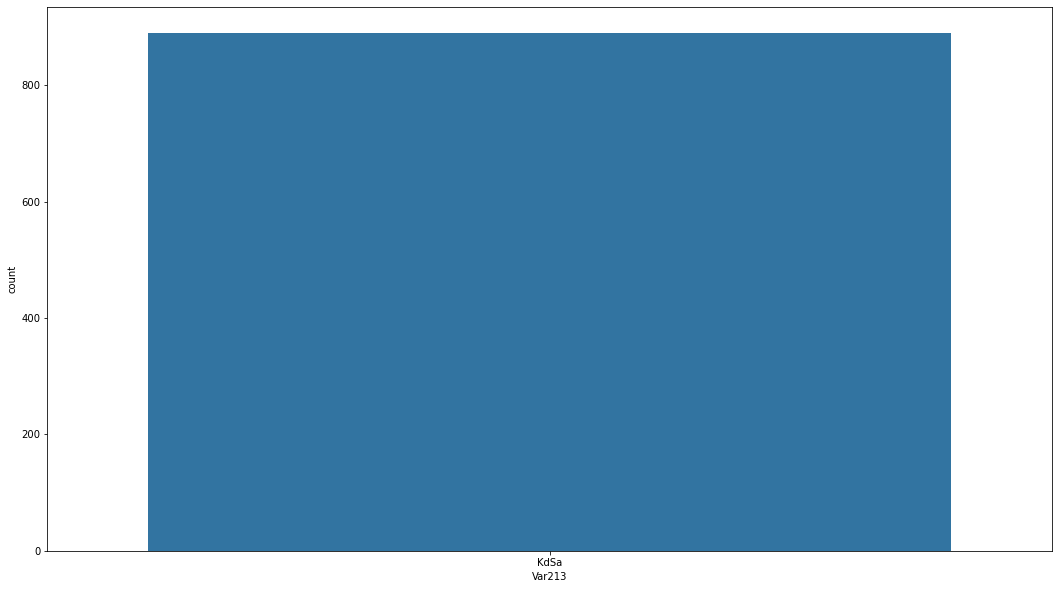

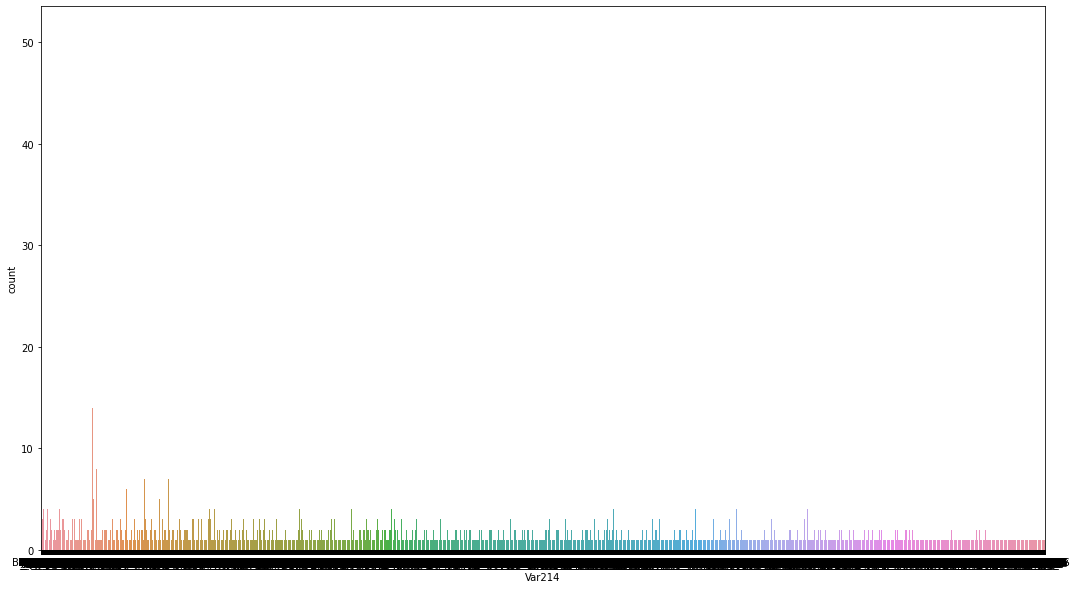

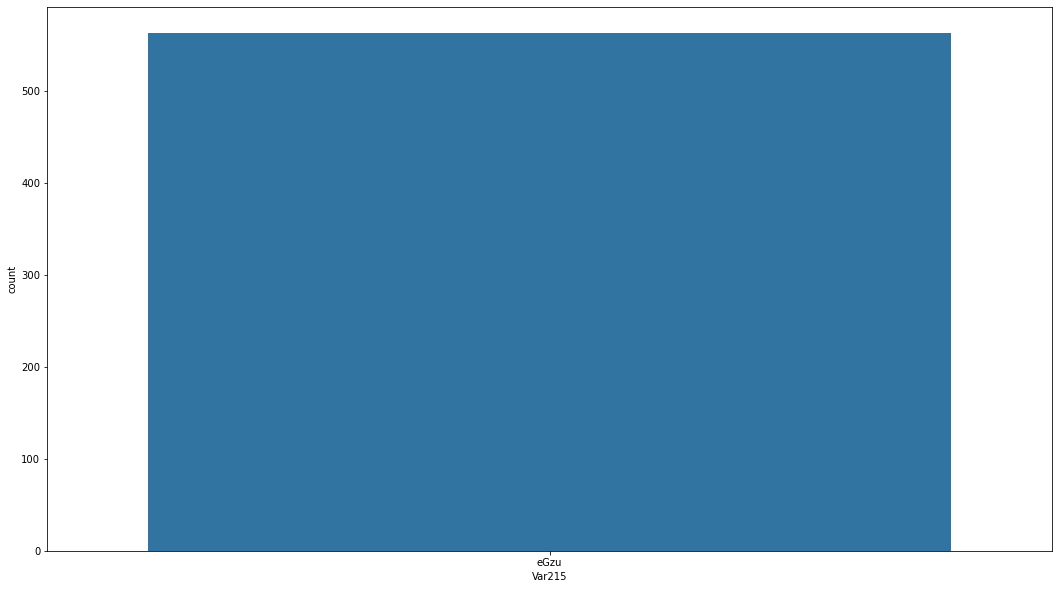

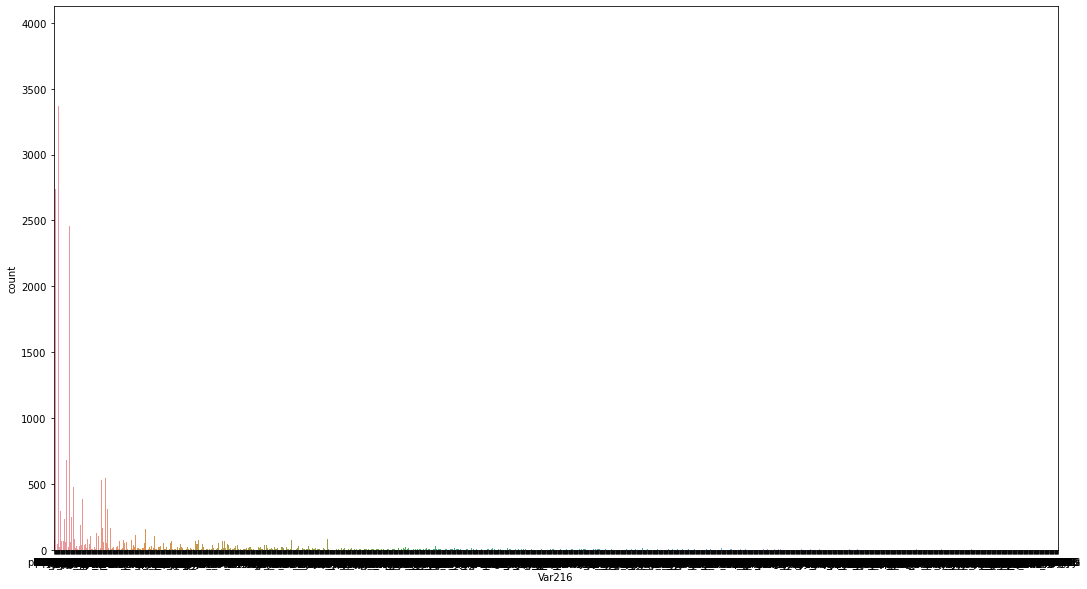

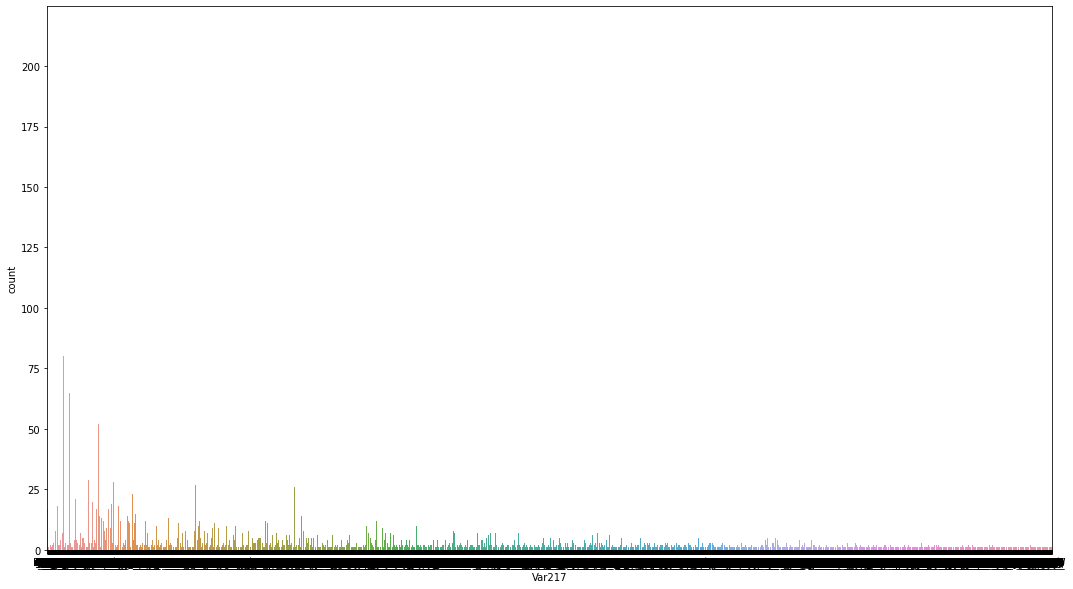

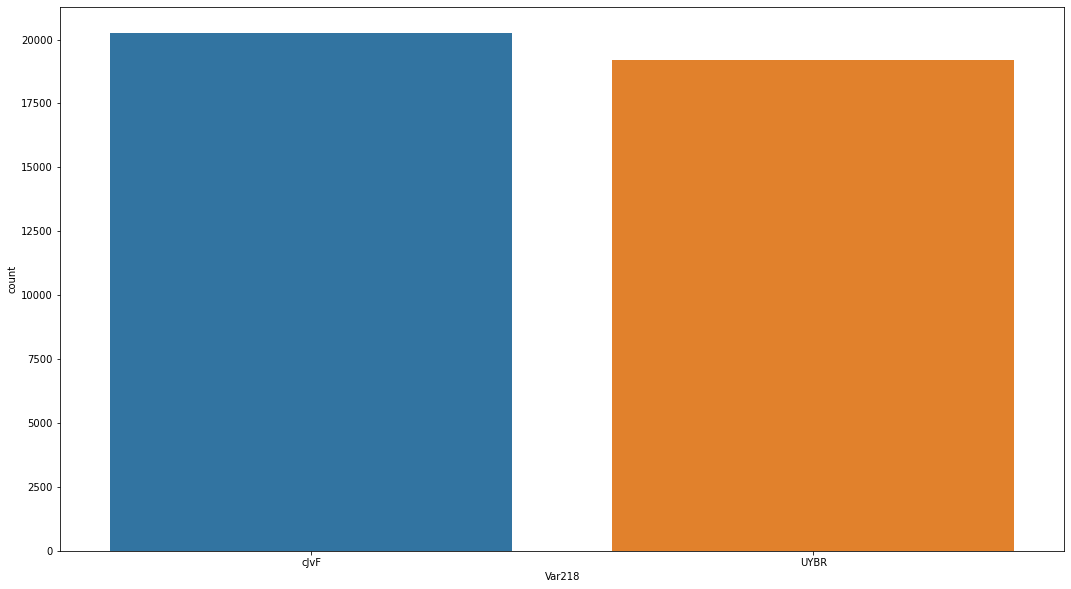

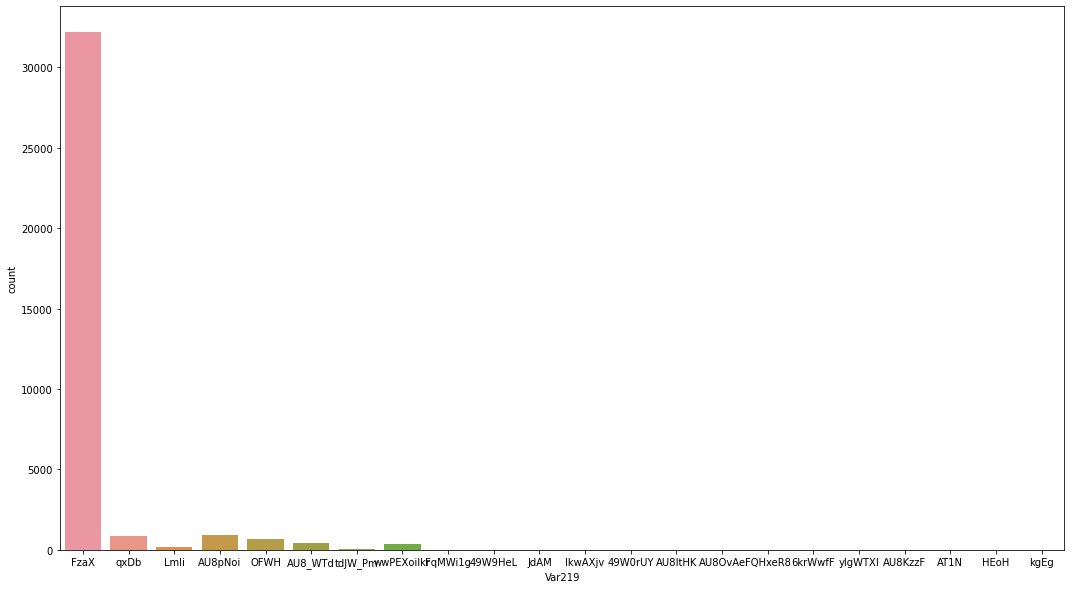

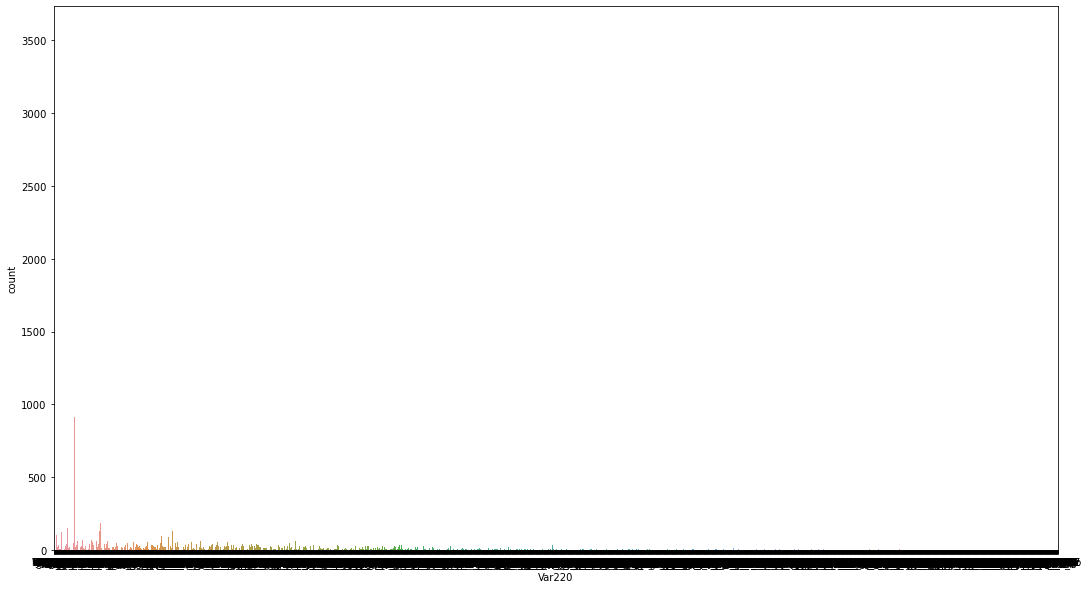

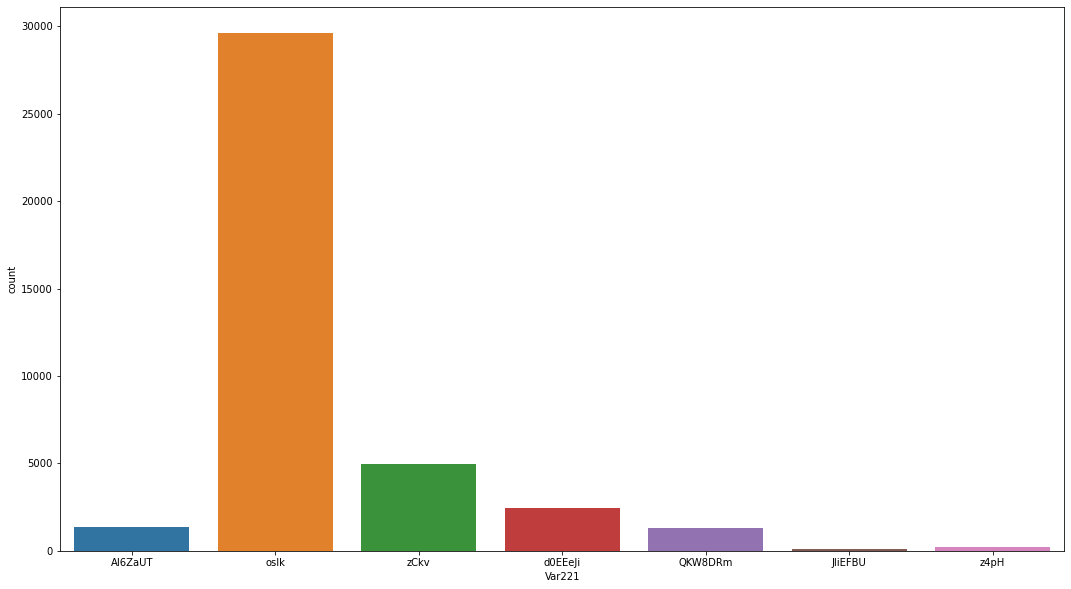

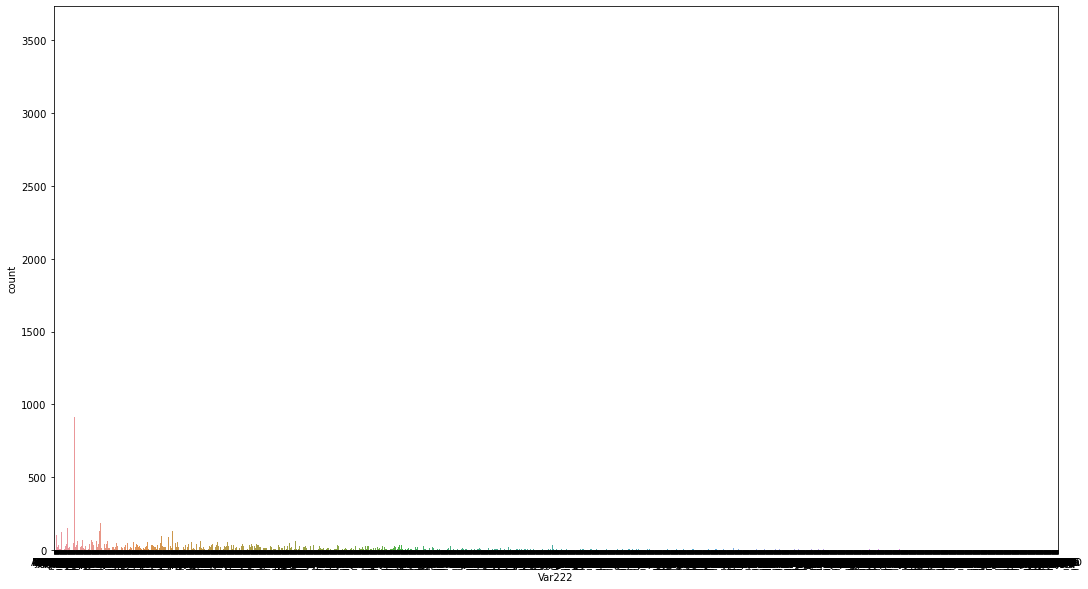

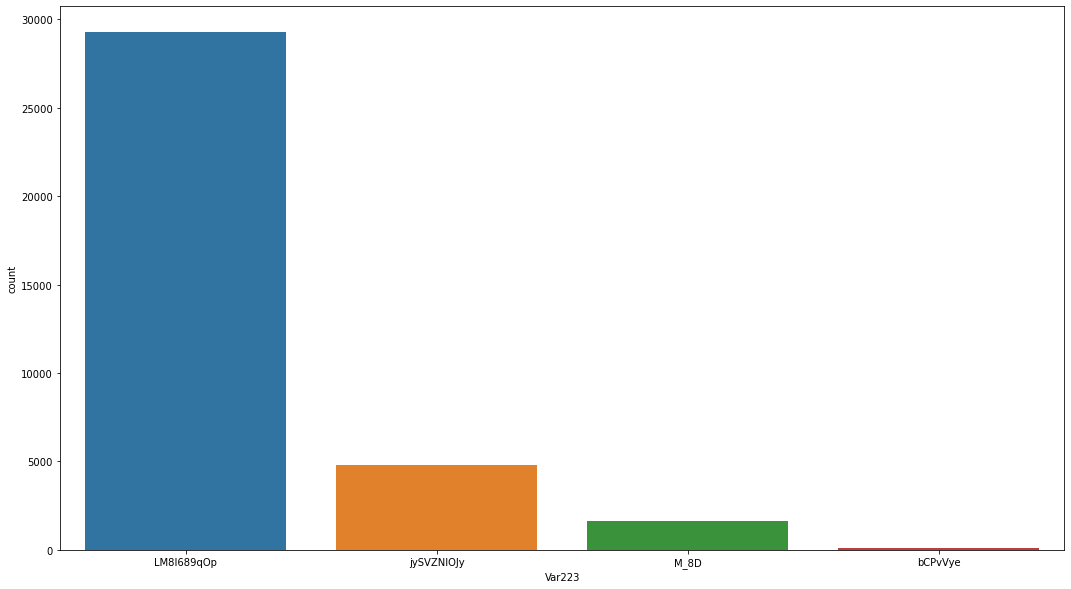

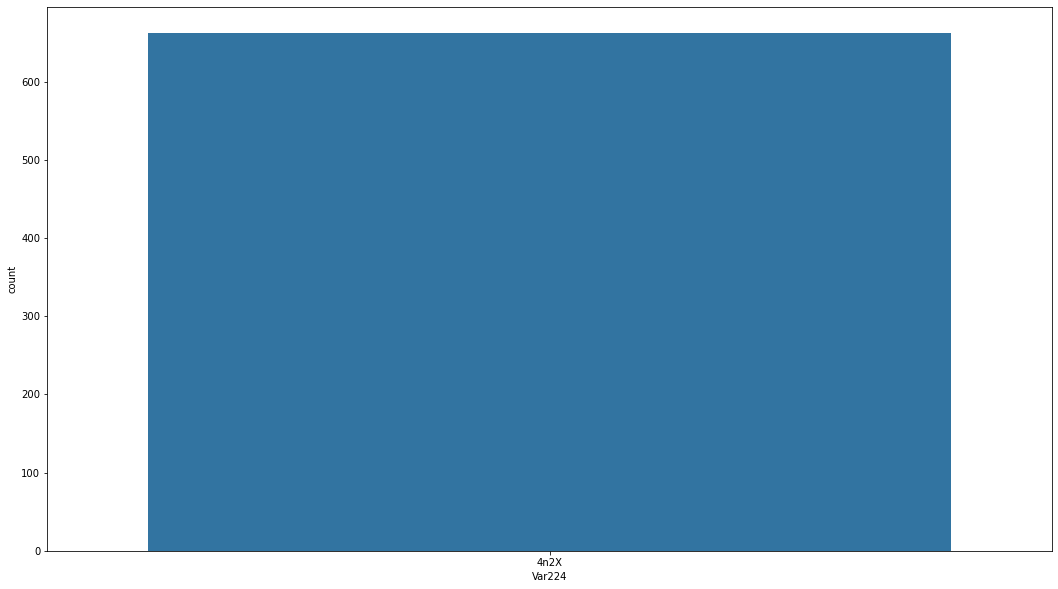

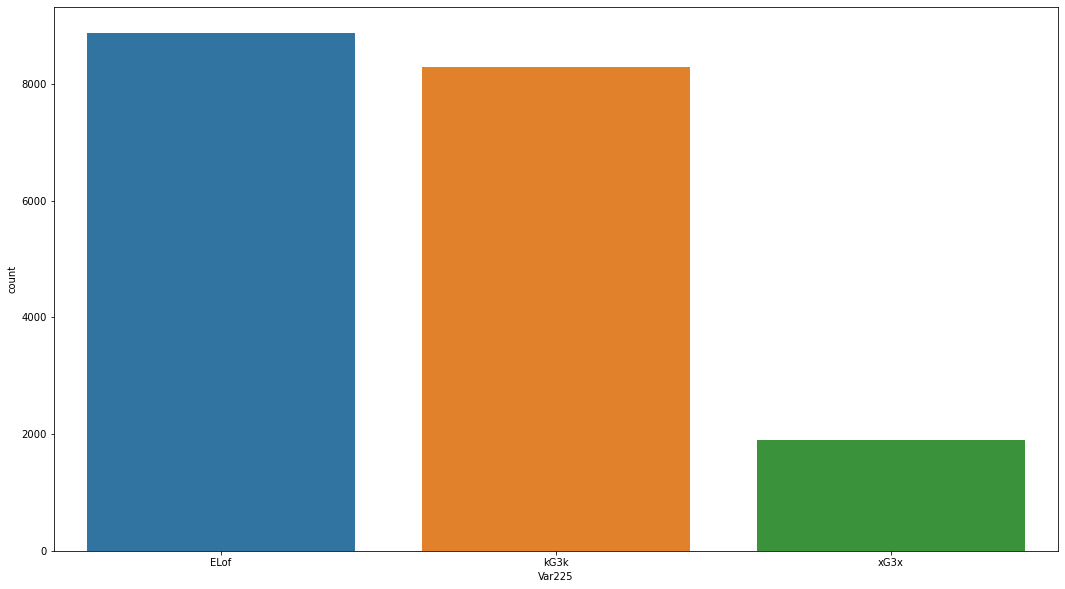

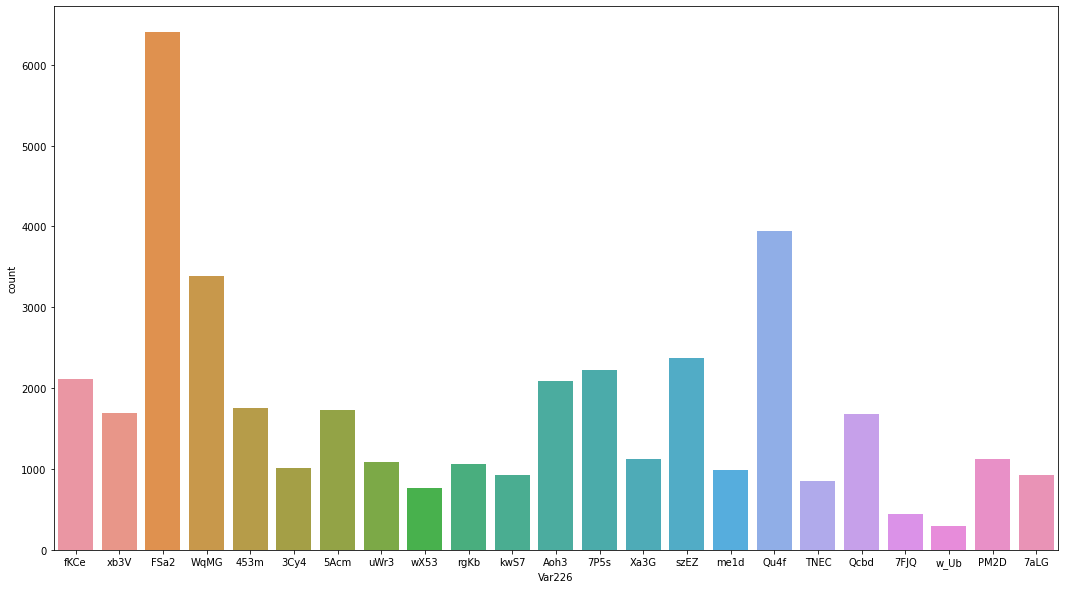

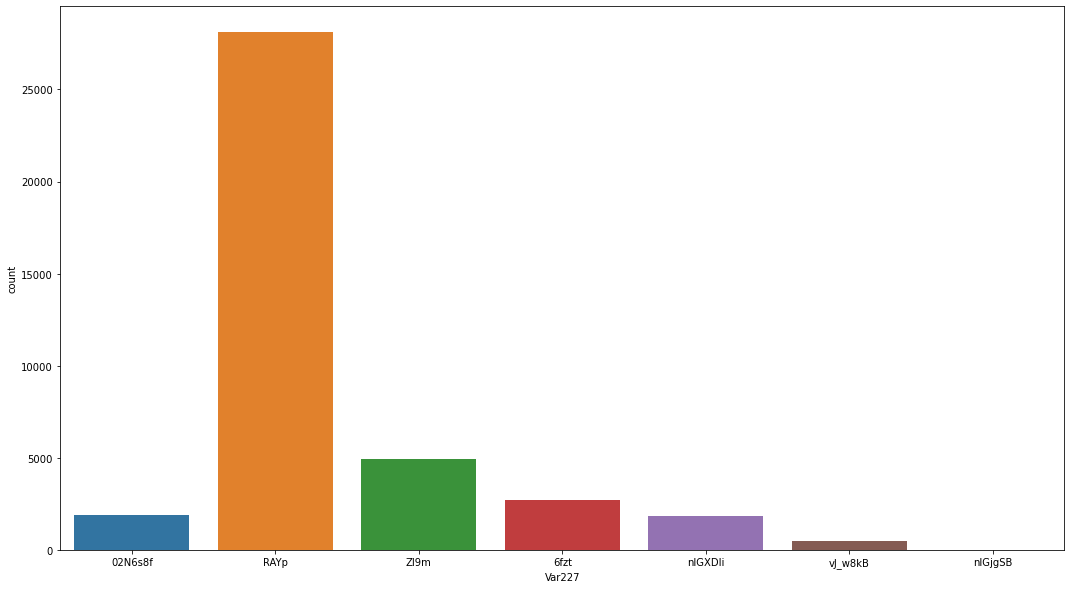

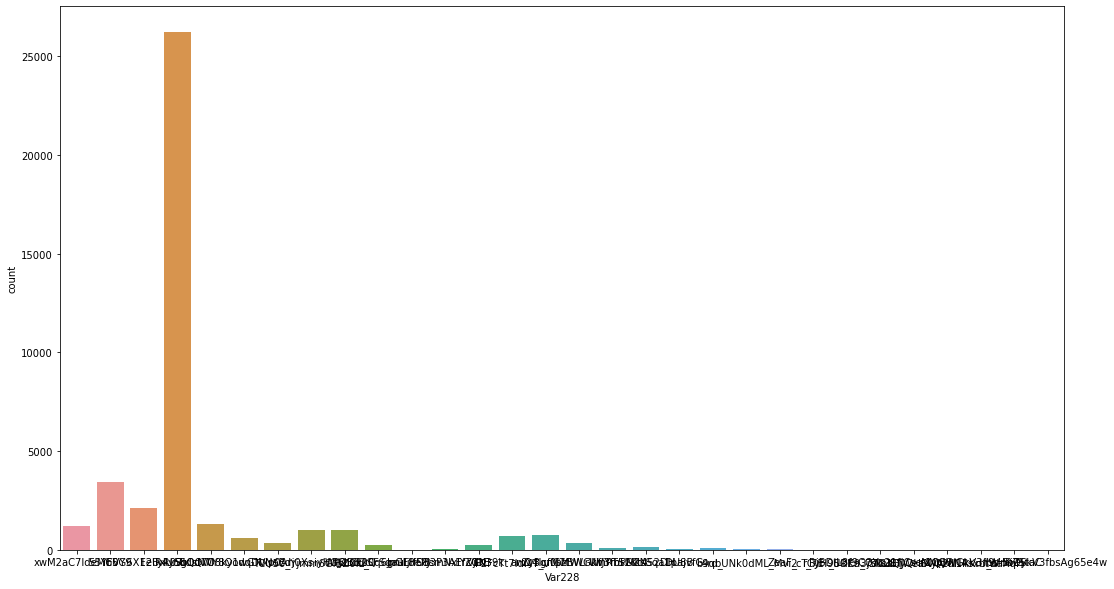

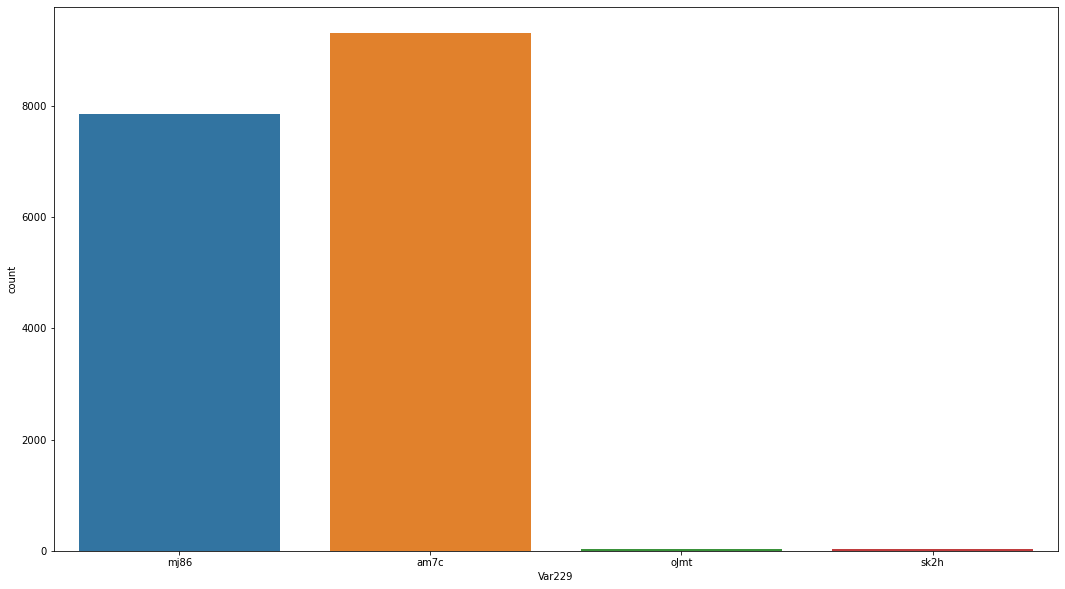

In [50]:
for feat in cat_features:
    df_cur = df[feat].dropna() 
    if not df_cur.empty:
        plt.figure(figsize=(18,10))
        sns.countplot(data=df, x=feat)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

1. Данные разнородные, нет явно выделенных зависимостей между вещественными признаками, есть несколько признаков с линейной связью. Также есть признаки похожие на константы.
2. Наиболее важные признаки которые явно могут повлиять на модель признаки у которых есть корреляция с меткой класа с них и стоит насинать
3. например есть признак Var 133 в целом он похож на шум, который ничего не дает
4. Важно отобрать признаки так как исходных данных много но не факт что какие то признаки информативны, например, в топе 20 есть признаки с зависимостью похоже на линейную